In [1]:
import time
import matplotlib.image as mpimg
from skimage.feature import hog
import numpy.random as random
import time
import pickle
from car_tracker import *
from moviepy.editor import VideoFileClip

## Load Model

In [2]:
dist_pickle = pickle.load( open("classifier.p", "rb" ) )
svc = dist_pickle["svc"]
X_scaler = dist_pickle["X_scaler"]
orient = dist_pickle["orient"]
pix_per_cell = dist_pickle["pix_per_cell"]
cell_per_block = dist_pickle["cell_per_block"]
spatial_size = dist_pickle["spatial_size"]
hist_bins = dist_pickle["hist_bins"]
colorspace = dist_pickle["color_space"]

## Search windows

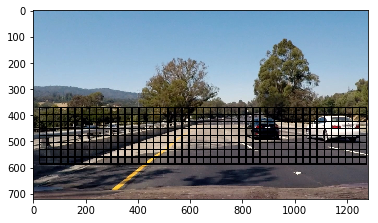

In [3]:
img = mpimg.imread('../test_images/test4.jpg')
draw_image = np.copy(img)
ystart = 370
ystop = 620
scale = 1.7
    
out_img = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, show=True)
windows, all_win = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
window_img = draw_boxes(draw_image, all_win, color=(0, 0, 1), thick=4)                    
plt.imshow(window_img)

plt.show()

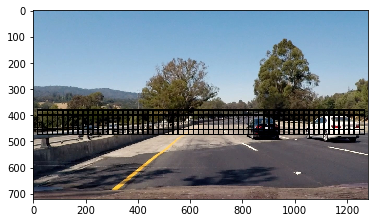

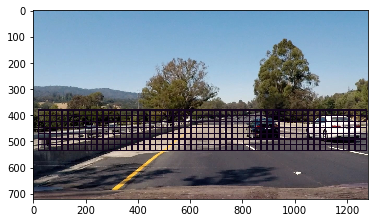

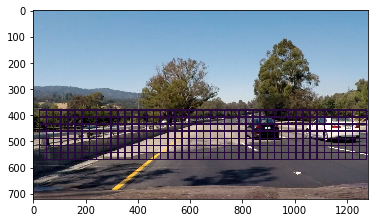

total window searched is 508
total hot window found is 39


In [4]:
# has 3 scales
hots = search_scales(img, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, show=True)

## Detected Cars

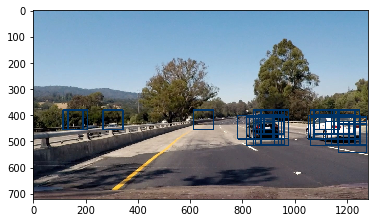

In [5]:
window_img = draw_boxes(img, hots, color=(0, 50, 100), thick=4)                    
plt.imshow(window_img)
plt.show()

## Heat Map and Threshold

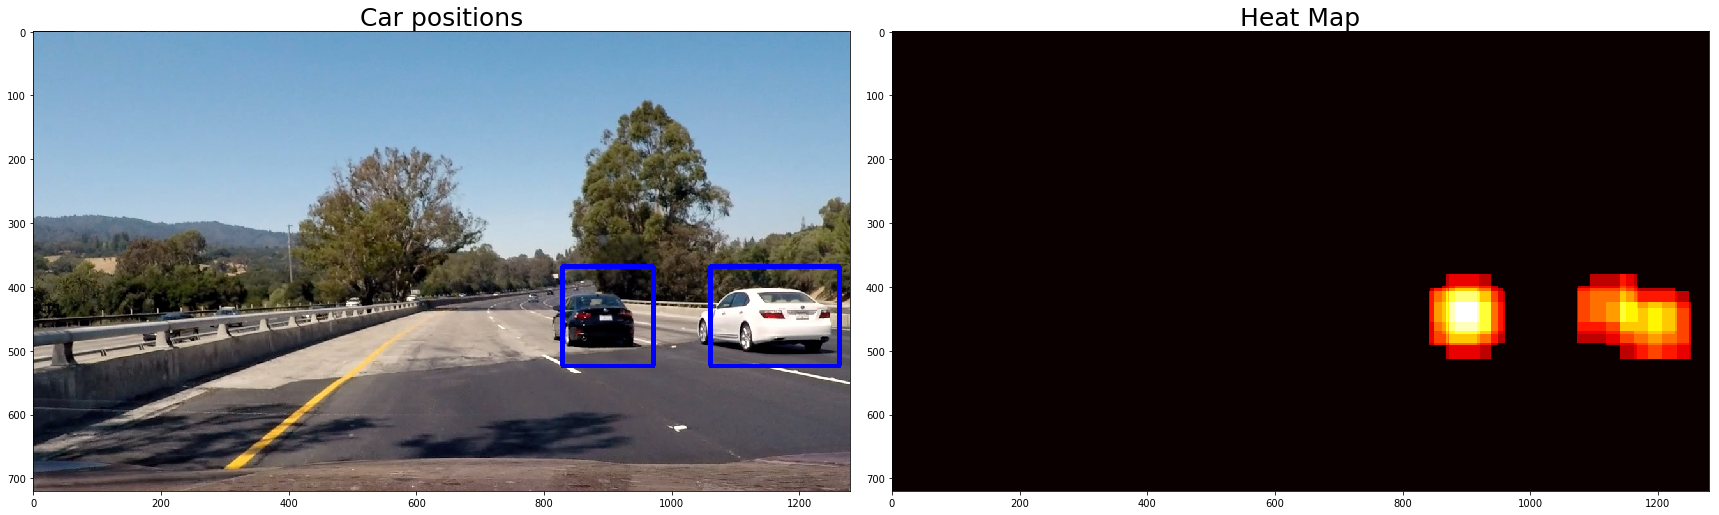

In [6]:
heat = np.zeros_like(img[:,:,0]).astype(np.float)
heat = add_heat(heat,hots)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,3)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heat)
draw_img = draw_labeled_bboxes(np.copy(img), labels)

plot_dual(draw_img, heatmap,'Car positions','Heat Map',cm2='hot')

## Video Processing

In [7]:
tracker = Tracker("classifier.p",8)
img = mpimg.imread('../test_images/test2.jpg')
ll = tracker.process_image(img)

total window searched is 508
total hot window found is 0


In [10]:
tracker = Tracker("classifier.p",8)
inpfile='../project_video.mp4'
outfile='../output_images/project_output.mp4'
clip = VideoFileClip(inpfile)
out_clip = clip.fl_image(tracker.process_image) 
%time out_clip.write_videofile(outfile, audio=False)

total window searched is 508
total hot window found is 0
[MoviePy] >>>> Building video ../output_images/project_output.mp4
[MoviePy] Writing video ../output_images/project_output.mp4



  0%|          | 1/1261 [00:00<18:57,  1.11it/s]

total window searched is 508
total hot window found is 0



  0%|          | 2/1261 [00:01<19:06,  1.10it/s]

total window searched is 508
total hot window found is 0



  0%|          | 3/1261 [00:02<19:06,  1.10it/s]

total window searched is 508
total hot window found is 1



  0%|          | 4/1261 [00:03<18:53,  1.11it/s]

total window searched is 508
total hot window found is 1



  0%|          | 5/1261 [00:04<18:50,  1.11it/s]

total window searched is 508
total hot window found is 2



  0%|          | 6/1261 [00:05<18:53,  1.11it/s]

total window searched is 508
total hot window found is 2



  1%|          | 7/1261 [00:06<18:50,  1.11it/s]

total window searched is 508
total hot window found is 0



  1%|          | 8/1261 [00:07<18:58,  1.10it/s]

total window searched is 508
total hot window found is 0



  1%|          | 9/1261 [00:08<19:29,  1.07it/s]

total window searched is 508
total hot window found is 1



  1%|          | 10/1261 [00:09<19:37,  1.06it/s]

total window searched is 508
total hot window found is 0



  1%|          | 11/1261 [00:10<19:23,  1.07it/s]

total window searched is 508
total hot window found is 0



  1%|          | 12/1261 [00:11<19:18,  1.08it/s]

total window searched is 508
total hot window found is 0



  1%|          | 13/1261 [00:11<19:07,  1.09it/s]

total window searched is 508
total hot window found is 0



  1%|          | 14/1261 [00:12<19:00,  1.09it/s]

total window searched is 508
total hot window found is 0



  1%|          | 15/1261 [00:13<18:50,  1.10it/s]

total window searched is 508
total hot window found is 0



  1%|▏         | 16/1261 [00:14<18:47,  1.10it/s]

total window searched is 508
total hot window found is 0



  1%|▏         | 17/1261 [00:15<18:49,  1.10it/s]

total window searched is 508
total hot window found is 0



  1%|▏         | 18/1261 [00:16<19:03,  1.09it/s]

total window searched is 508
total hot window found is 0



  2%|▏         | 19/1261 [00:17<21:37,  1.04s/it]

total window searched is 508
total hot window found is 0



  2%|▏         | 20/1261 [00:19<23:37,  1.14s/it]

total window searched is 508
total hot window found is 0



  2%|▏         | 21/1261 [00:20<24:07,  1.17s/it]

total window searched is 508
total hot window found is 0



  2%|▏         | 22/1261 [00:21<22:41,  1.10s/it]

total window searched is 508
total hot window found is 0



  2%|▏         | 23/1261 [00:22<21:08,  1.02s/it]

total window searched is 508
total hot window found is 0



  2%|▏         | 24/1261 [00:23<20:02,  1.03it/s]

total window searched is 508
total hot window found is 0



  2%|▏         | 25/1261 [00:23<19:11,  1.07it/s]

total window searched is 508
total hot window found is 1



  2%|▏         | 26/1261 [00:24<18:36,  1.11it/s]

total window searched is 508
total hot window found is 0



  2%|▏         | 27/1261 [00:25<18:09,  1.13it/s]

total window searched is 508
total hot window found is 0



  2%|▏         | 28/1261 [00:26<17:53,  1.15it/s]

total window searched is 508
total hot window found is 0



  2%|▏         | 29/1261 [00:27<17:43,  1.16it/s]

total window searched is 508
total hot window found is 1



  2%|▏         | 30/1261 [00:28<17:36,  1.17it/s]

total window searched is 508
total hot window found is 1



  2%|▏         | 31/1261 [00:28<17:26,  1.17it/s]

total window searched is 508
total hot window found is 0



  3%|▎         | 32/1261 [00:29<17:23,  1.18it/s]

total window searched is 508
total hot window found is 0



  3%|▎         | 33/1261 [00:30<17:24,  1.18it/s]

total window searched is 508
total hot window found is 0



  3%|▎         | 34/1261 [00:31<17:20,  1.18it/s]

total window searched is 508
total hot window found is 0



  3%|▎         | 35/1261 [00:32<17:18,  1.18it/s]

total window searched is 508
total hot window found is 0



  3%|▎         | 36/1261 [00:33<17:21,  1.18it/s]

total window searched is 508
total hot window found is 0



  3%|▎         | 37/1261 [00:34<17:18,  1.18it/s]

total window searched is 508
total hot window found is 1



  3%|▎         | 38/1261 [00:34<17:18,  1.18it/s]

total window searched is 508
total hot window found is 1



  3%|▎         | 39/1261 [00:35<17:18,  1.18it/s]

total window searched is 508
total hot window found is 1



  3%|▎         | 40/1261 [00:36<17:18,  1.18it/s]

total window searched is 508
total hot window found is 1



  3%|▎         | 41/1261 [00:37<17:26,  1.17it/s]

total window searched is 508
total hot window found is 1



  3%|▎         | 42/1261 [00:38<17:17,  1.17it/s]

total window searched is 508
total hot window found is 1



  3%|▎         | 43/1261 [00:39<17:24,  1.17it/s]

total window searched is 508
total hot window found is 0



  3%|▎         | 44/1261 [00:39<17:16,  1.17it/s]

total window searched is 508
total hot window found is 0



  4%|▎         | 45/1261 [00:40<17:11,  1.18it/s]

total window searched is 508
total hot window found is 0



  4%|▎         | 46/1261 [00:41<17:12,  1.18it/s]

total window searched is 508
total hot window found is 0



  4%|▎         | 47/1261 [00:42<17:06,  1.18it/s]

total window searched is 508
total hot window found is 0



  4%|▍         | 48/1261 [00:43<16:59,  1.19it/s]

total window searched is 508
total hot window found is 1



  4%|▍         | 49/1261 [00:44<16:59,  1.19it/s]

total window searched is 508
total hot window found is 0



  4%|▍         | 50/1261 [00:45<16:56,  1.19it/s]

total window searched is 508
total hot window found is 1



  4%|▍         | 51/1261 [00:45<16:56,  1.19it/s]

total window searched is 508
total hot window found is 0



  4%|▍         | 52/1261 [00:46<16:50,  1.20it/s]

total window searched is 508
total hot window found is 0



  4%|▍         | 53/1261 [00:47<16:47,  1.20it/s]

total window searched is 508
total hot window found is 0



  4%|▍         | 54/1261 [00:48<16:46,  1.20it/s]

total window searched is 508
total hot window found is 0



  4%|▍         | 55/1261 [00:49<18:00,  1.12it/s]

total window searched is 508
total hot window found is 0



  4%|▍         | 56/1261 [00:50<19:33,  1.03it/s]

total window searched is 508
total hot window found is 0



  5%|▍         | 57/1261 [00:51<18:59,  1.06it/s]

total window searched is 508
total hot window found is 0



  5%|▍         | 58/1261 [00:52<18:17,  1.10it/s]

total window searched is 508
total hot window found is 0



  5%|▍         | 59/1261 [00:53<17:44,  1.13it/s]

total window searched is 508
total hot window found is 0



  5%|▍         | 60/1261 [00:53<17:27,  1.15it/s]

total window searched is 508
total hot window found is 0



  5%|▍         | 61/1261 [00:54<17:08,  1.17it/s]

total window searched is 508
total hot window found is 0



  5%|▍         | 62/1261 [00:55<16:55,  1.18it/s]

total window searched is 508
total hot window found is 0



  5%|▍         | 63/1261 [00:56<16:47,  1.19it/s]

total window searched is 508
total hot window found is 0



  5%|▌         | 64/1261 [00:57<16:43,  1.19it/s]

total window searched is 508
total hot window found is 0



  5%|▌         | 65/1261 [00:58<16:37,  1.20it/s]

total window searched is 508
total hot window found is 0



  5%|▌         | 66/1261 [00:58<16:32,  1.20it/s]

total window searched is 508
total hot window found is 0



  5%|▌         | 67/1261 [00:59<16:29,  1.21it/s]

total window searched is 508
total hot window found is 0



  5%|▌         | 68/1261 [01:00<16:29,  1.21it/s]

total window searched is 508
total hot window found is 0



  5%|▌         | 69/1261 [01:01<16:31,  1.20it/s]

total window searched is 508
total hot window found is 0



  6%|▌         | 70/1261 [01:02<16:28,  1.20it/s]

total window searched is 508
total hot window found is 0



  6%|▌         | 71/1261 [01:03<16:55,  1.17it/s]

total window searched is 508
total hot window found is 0



  6%|▌         | 72/1261 [01:03<16:59,  1.17it/s]

total window searched is 508
total hot window found is 0



  6%|▌         | 73/1261 [01:04<16:49,  1.18it/s]

total window searched is 508
total hot window found is 0



  6%|▌         | 74/1261 [01:05<16:46,  1.18it/s]

total window searched is 508
total hot window found is 0



  6%|▌         | 75/1261 [01:06<16:39,  1.19it/s]

total window searched is 508
total hot window found is 0



  6%|▌         | 76/1261 [01:07<16:35,  1.19it/s]

total window searched is 508
total hot window found is 0



  6%|▌         | 77/1261 [01:08<16:26,  1.20it/s]

total window searched is 508
total hot window found is 0



  6%|▌         | 78/1261 [01:08<16:27,  1.20it/s]

total window searched is 508
total hot window found is 0



  6%|▋         | 79/1261 [01:09<16:19,  1.21it/s]

total window searched is 508
total hot window found is 0



  6%|▋         | 80/1261 [01:10<16:20,  1.20it/s]

total window searched is 508
total hot window found is 0



  6%|▋         | 81/1261 [01:11<16:19,  1.20it/s]

total window searched is 508
total hot window found is 0



  7%|▋         | 82/1261 [01:12<16:17,  1.21it/s]

total window searched is 508
total hot window found is 0



  7%|▋         | 83/1261 [01:13<16:16,  1.21it/s]

total window searched is 508
total hot window found is 0



  7%|▋         | 84/1261 [01:13<16:15,  1.21it/s]

total window searched is 508
total hot window found is 0



  7%|▋         | 85/1261 [01:14<16:16,  1.20it/s]

total window searched is 508
total hot window found is 0



  7%|▋         | 86/1261 [01:15<16:13,  1.21it/s]

total window searched is 508
total hot window found is 0



  7%|▋         | 87/1261 [01:16<16:16,  1.20it/s]

total window searched is 508
total hot window found is 0



  7%|▋         | 88/1261 [01:17<16:18,  1.20it/s]

total window searched is 508
total hot window found is 0



  7%|▋         | 89/1261 [01:18<16:14,  1.20it/s]

total window searched is 508
total hot window found is 0



  7%|▋         | 90/1261 [01:18<16:18,  1.20it/s]

total window searched is 508
total hot window found is 0



  7%|▋         | 91/1261 [01:19<16:11,  1.20it/s]

total window searched is 508
total hot window found is 0



  7%|▋         | 92/1261 [01:20<16:10,  1.21it/s]

total window searched is 508
total hot window found is 0



  7%|▋         | 93/1261 [01:21<16:11,  1.20it/s]

total window searched is 508
total hot window found is 0



  7%|▋         | 94/1261 [01:22<16:03,  1.21it/s]

total window searched is 508
total hot window found is 0



  8%|▊         | 95/1261 [01:23<15:59,  1.22it/s]

total window searched is 508
total hot window found is 0



  8%|▊         | 96/1261 [01:23<16:01,  1.21it/s]

total window searched is 508
total hot window found is 1



  8%|▊         | 97/1261 [01:24<16:02,  1.21it/s]

total window searched is 508
total hot window found is 0



  8%|▊         | 98/1261 [01:25<16:04,  1.21it/s]

total window searched is 508
total hot window found is 0



  8%|▊         | 99/1261 [01:26<16:05,  1.20it/s]

total window searched is 508
total hot window found is 0



  8%|▊         | 100/1261 [01:27<16:03,  1.21it/s]

total window searched is 508
total hot window found is 0



  8%|▊         | 101/1261 [01:28<15:59,  1.21it/s]

total window searched is 508
total hot window found is 0



  8%|▊         | 102/1261 [01:28<16:05,  1.20it/s]

total window searched is 508
total hot window found is 0



  8%|▊         | 103/1261 [01:29<16:03,  1.20it/s]

total window searched is 508
total hot window found is 0



  8%|▊         | 104/1261 [01:30<16:02,  1.20it/s]

total window searched is 508
total hot window found is 1



  8%|▊         | 105/1261 [01:31<16:03,  1.20it/s]

total window searched is 508
total hot window found is 0



  8%|▊         | 106/1261 [01:32<15:58,  1.20it/s]

total window searched is 508
total hot window found is 0



  8%|▊         | 107/1261 [01:33<16:00,  1.20it/s]

total window searched is 508
total hot window found is 0



  9%|▊         | 108/1261 [01:33<16:04,  1.20it/s]

total window searched is 508
total hot window found is 0



  9%|▊         | 109/1261 [01:34<16:03,  1.20it/s]

total window searched is 508
total hot window found is 0



  9%|▊         | 110/1261 [01:35<16:01,  1.20it/s]

total window searched is 508
total hot window found is 0



  9%|▉         | 111/1261 [01:36<16:04,  1.19it/s]

total window searched is 508
total hot window found is 0



  9%|▉         | 112/1261 [01:37<16:08,  1.19it/s]

total window searched is 508
total hot window found is 0



  9%|▉         | 113/1261 [01:38<16:02,  1.19it/s]

total window searched is 508
total hot window found is 0



  9%|▉         | 114/1261 [01:38<15:59,  1.20it/s]

total window searched is 508
total hot window found is 1



  9%|▉         | 115/1261 [01:39<15:56,  1.20it/s]

total window searched is 508
total hot window found is 1



  9%|▉         | 116/1261 [01:40<15:59,  1.19it/s]

total window searched is 508
total hot window found is 1



  9%|▉         | 117/1261 [01:41<16:00,  1.19it/s]

total window searched is 508
total hot window found is 0



  9%|▉         | 118/1261 [01:42<15:57,  1.19it/s]

total window searched is 508
total hot window found is 0



  9%|▉         | 119/1261 [01:43<15:50,  1.20it/s]

total window searched is 508
total hot window found is 0



 10%|▉         | 120/1261 [01:43<15:52,  1.20it/s]

total window searched is 508
total hot window found is 1



 10%|▉         | 121/1261 [01:44<15:46,  1.20it/s]

total window searched is 508
total hot window found is 0



 10%|▉         | 122/1261 [01:45<15:45,  1.20it/s]

total window searched is 508
total hot window found is 0



 10%|▉         | 123/1261 [01:46<15:40,  1.21it/s]

total window searched is 508
total hot window found is 0



 10%|▉         | 124/1261 [01:47<15:40,  1.21it/s]

total window searched is 508
total hot window found is 0



 10%|▉         | 125/1261 [01:48<15:40,  1.21it/s]

total window searched is 508
total hot window found is 0



 10%|▉         | 126/1261 [01:48<15:40,  1.21it/s]

total window searched is 508
total hot window found is 1



 10%|█         | 127/1261 [01:49<15:35,  1.21it/s]

total window searched is 508
total hot window found is 0



 10%|█         | 128/1261 [01:50<15:37,  1.21it/s]

total window searched is 508
total hot window found is 1



 10%|█         | 129/1261 [01:51<15:38,  1.21it/s]

total window searched is 508
total hot window found is 0



 10%|█         | 130/1261 [01:52<15:39,  1.20it/s]

total window searched is 508
total hot window found is 2



 10%|█         | 131/1261 [01:53<15:38,  1.20it/s]

total window searched is 508
total hot window found is 2



 10%|█         | 132/1261 [01:53<15:36,  1.21it/s]

total window searched is 508
total hot window found is 3



 11%|█         | 133/1261 [01:54<15:36,  1.20it/s]

total window searched is 508
total hot window found is 1



 11%|█         | 134/1261 [01:55<15:35,  1.20it/s]

total window searched is 508
total hot window found is 2



 11%|█         | 135/1261 [01:56<15:36,  1.20it/s]

total window searched is 508
total hot window found is 2



 11%|█         | 136/1261 [01:57<15:42,  1.19it/s]

total window searched is 508
total hot window found is 5



 11%|█         | 137/1261 [01:58<15:41,  1.19it/s]

total window searched is 508
total hot window found is 7



 11%|█         | 138/1261 [01:58<15:41,  1.19it/s]

total window searched is 508
total hot window found is 5



 11%|█         | 139/1261 [01:59<15:40,  1.19it/s]

total window searched is 508
total hot window found is 0



 11%|█         | 140/1261 [02:00<15:37,  1.20it/s]

total window searched is 508
total hot window found is 1



 11%|█         | 141/1261 [02:01<15:34,  1.20it/s]

total window searched is 508
total hot window found is 0



 11%|█▏        | 142/1261 [02:02<15:39,  1.19it/s]

total window searched is 508
total hot window found is 0



 11%|█▏        | 143/1261 [02:03<15:39,  1.19it/s]

total window searched is 508
total hot window found is 0



 11%|█▏        | 144/1261 [02:03<15:41,  1.19it/s]

total window searched is 508
total hot window found is 0



 11%|█▏        | 145/1261 [02:04<15:36,  1.19it/s]

total window searched is 508
total hot window found is 1



 12%|█▏        | 146/1261 [02:05<15:33,  1.19it/s]

total window searched is 508
total hot window found is 0



 12%|█▏        | 147/1261 [02:06<15:30,  1.20it/s]

total window searched is 508
total hot window found is 0



 12%|█▏        | 148/1261 [02:07<15:34,  1.19it/s]

total window searched is 508
total hot window found is 0



 12%|█▏        | 149/1261 [02:08<15:32,  1.19it/s]

total window searched is 508
total hot window found is 0



 12%|█▏        | 150/1261 [02:08<15:35,  1.19it/s]

total window searched is 508
total hot window found is 0



 12%|█▏        | 151/1261 [02:09<15:32,  1.19it/s]

total window searched is 508
total hot window found is 0



 12%|█▏        | 152/1261 [02:10<15:27,  1.20it/s]

total window searched is 508
total hot window found is 0



 12%|█▏        | 153/1261 [02:11<15:22,  1.20it/s]

total window searched is 508
total hot window found is 1



 12%|█▏        | 154/1261 [02:12<15:22,  1.20it/s]

total window searched is 508
total hot window found is 1



 12%|█▏        | 155/1261 [02:13<15:18,  1.20it/s]

total window searched is 508
total hot window found is 1



 12%|█▏        | 156/1261 [02:13<15:20,  1.20it/s]

total window searched is 508
total hot window found is 0



 12%|█▏        | 157/1261 [02:14<15:22,  1.20it/s]

total window searched is 508
total hot window found is 1



 13%|█▎        | 158/1261 [02:15<15:21,  1.20it/s]

total window searched is 508
total hot window found is 0



 13%|█▎        | 159/1261 [02:16<15:20,  1.20it/s]

total window searched is 508
total hot window found is 0



 13%|█▎        | 160/1261 [02:17<15:24,  1.19it/s]

total window searched is 508
total hot window found is 1



 13%|█▎        | 161/1261 [02:18<15:24,  1.19it/s]

total window searched is 508
total hot window found is 3



 13%|█▎        | 162/1261 [02:19<15:29,  1.18it/s]

total window searched is 508
total hot window found is 3



 13%|█▎        | 163/1261 [02:19<15:28,  1.18it/s]

total window searched is 508
total hot window found is 6



 13%|█▎        | 164/1261 [02:20<15:25,  1.19it/s]

total window searched is 508
total hot window found is 6



 13%|█▎        | 165/1261 [02:21<15:26,  1.18it/s]

total window searched is 508
total hot window found is 7



 13%|█▎        | 166/1261 [02:22<15:30,  1.18it/s]

total window searched is 508
total hot window found is 7



 13%|█▎        | 167/1261 [02:23<15:28,  1.18it/s]

total window searched is 508
total hot window found is 6



 13%|█▎        | 168/1261 [02:24<15:31,  1.17it/s]

total window searched is 508
total hot window found is 10



 13%|█▎        | 169/1261 [02:24<15:29,  1.18it/s]

total window searched is 508
total hot window found is 10



 13%|█▎        | 170/1261 [02:25<15:26,  1.18it/s]

total window searched is 508
total hot window found is 12



 14%|█▎        | 171/1261 [02:26<15:22,  1.18it/s]

total window searched is 508
total hot window found is 12



 14%|█▎        | 172/1261 [02:27<15:26,  1.18it/s]

total window searched is 508
total hot window found is 10



 14%|█▎        | 173/1261 [02:28<15:23,  1.18it/s]

total window searched is 508
total hot window found is 9



 14%|█▍        | 174/1261 [02:29<15:24,  1.18it/s]

total window searched is 508
total hot window found is 10



 14%|█▍        | 175/1261 [02:30<15:22,  1.18it/s]

total window searched is 508
total hot window found is 10



 14%|█▍        | 176/1261 [02:30<15:22,  1.18it/s]

total window searched is 508
total hot window found is 10



 14%|█▍        | 177/1261 [02:31<15:21,  1.18it/s]

total window searched is 508
total hot window found is 10



 14%|█▍        | 178/1261 [02:32<15:24,  1.17it/s]

total window searched is 508
total hot window found is 12



 14%|█▍        | 179/1261 [02:33<15:33,  1.16it/s]

total window searched is 508
total hot window found is 13



 14%|█▍        | 180/1261 [02:34<15:31,  1.16it/s]

total window searched is 508
total hot window found is 13



 14%|█▍        | 181/1261 [02:35<15:27,  1.16it/s]

total window searched is 508
total hot window found is 8



 14%|█▍        | 182/1261 [02:36<15:23,  1.17it/s]

total window searched is 508
total hot window found is 7



 15%|█▍        | 183/1261 [02:36<15:23,  1.17it/s]

total window searched is 508
total hot window found is 7



 15%|█▍        | 184/1261 [02:37<15:20,  1.17it/s]

total window searched is 508
total hot window found is 8



 15%|█▍        | 185/1261 [02:38<15:15,  1.18it/s]

total window searched is 508
total hot window found is 5



 15%|█▍        | 186/1261 [02:39<15:16,  1.17it/s]

total window searched is 508
total hot window found is 5



 15%|█▍        | 187/1261 [02:40<15:14,  1.17it/s]

total window searched is 508
total hot window found is 5



 15%|█▍        | 188/1261 [02:41<15:11,  1.18it/s]

total window searched is 508
total hot window found is 7



 15%|█▍        | 189/1261 [02:42<15:10,  1.18it/s]

total window searched is 508
total hot window found is 6



 15%|█▌        | 190/1261 [02:42<15:13,  1.17it/s]

total window searched is 508
total hot window found is 9



 15%|█▌        | 191/1261 [02:43<15:14,  1.17it/s]

total window searched is 508
total hot window found is 9



 15%|█▌        | 192/1261 [02:44<15:13,  1.17it/s]

total window searched is 508
total hot window found is 10



 15%|█▌        | 193/1261 [02:45<15:09,  1.17it/s]

total window searched is 508
total hot window found is 10



 15%|█▌        | 194/1261 [02:46<15:11,  1.17it/s]

total window searched is 508
total hot window found is 10



 15%|█▌        | 195/1261 [02:47<15:07,  1.17it/s]

total window searched is 508
total hot window found is 10



 16%|█▌        | 196/1261 [02:47<15:07,  1.17it/s]

total window searched is 508
total hot window found is 8



 16%|█▌        | 197/1261 [02:48<15:04,  1.18it/s]

total window searched is 508
total hot window found is 6



 16%|█▌        | 198/1261 [02:49<15:02,  1.18it/s]

total window searched is 508
total hot window found is 7



 16%|█▌        | 199/1261 [02:50<14:58,  1.18it/s]

total window searched is 508
total hot window found is 7



 16%|█▌        | 200/1261 [02:51<14:55,  1.18it/s]

total window searched is 508
total hot window found is 7



 16%|█▌        | 201/1261 [02:52<14:56,  1.18it/s]

total window searched is 508
total hot window found is 9



 16%|█▌        | 202/1261 [02:53<15:01,  1.17it/s]

total window searched is 508
total hot window found is 9



 16%|█▌        | 203/1261 [02:53<14:58,  1.18it/s]

total window searched is 508
total hot window found is 10



 16%|█▌        | 204/1261 [02:54<14:57,  1.18it/s]

total window searched is 508
total hot window found is 10



 16%|█▋        | 205/1261 [02:55<15:01,  1.17it/s]

total window searched is 508
total hot window found is 13



 16%|█▋        | 206/1261 [02:56<15:01,  1.17it/s]

total window searched is 508
total hot window found is 10



 16%|█▋        | 207/1261 [02:57<15:00,  1.17it/s]

total window searched is 508
total hot window found is 10



 16%|█▋        | 208/1261 [02:58<15:02,  1.17it/s]

total window searched is 508
total hot window found is 10



 17%|█▋        | 209/1261 [02:59<15:01,  1.17it/s]

total window searched is 508
total hot window found is 10



 17%|█▋        | 210/1261 [02:59<15:02,  1.16it/s]

total window searched is 508
total hot window found is 11



 17%|█▋        | 211/1261 [03:00<14:59,  1.17it/s]

total window searched is 508
total hot window found is 4



 17%|█▋        | 212/1261 [03:01<14:53,  1.17it/s]

total window searched is 508
total hot window found is 5



 17%|█▋        | 213/1261 [03:02<14:50,  1.18it/s]

total window searched is 508
total hot window found is 6



 17%|█▋        | 214/1261 [03:03<15:24,  1.13it/s]

total window searched is 508
total hot window found is 7



 17%|█▋        | 215/1261 [03:04<15:16,  1.14it/s]

total window searched is 508
total hot window found is 7



 17%|█▋        | 216/1261 [03:05<15:16,  1.14it/s]

total window searched is 508
total hot window found is 10



 17%|█▋        | 217/1261 [03:05<15:02,  1.16it/s]

total window searched is 508
total hot window found is 7



 17%|█▋        | 218/1261 [03:06<14:55,  1.16it/s]

total window searched is 508
total hot window found is 6



 17%|█▋        | 219/1261 [03:07<14:49,  1.17it/s]

total window searched is 508
total hot window found is 8



 17%|█▋        | 220/1261 [03:08<14:42,  1.18it/s]

total window searched is 508
total hot window found is 8



 18%|█▊        | 221/1261 [03:09<14:40,  1.18it/s]

total window searched is 508
total hot window found is 11



 18%|█▊        | 222/1261 [03:10<14:36,  1.19it/s]

total window searched is 508
total hot window found is 11



 18%|█▊        | 223/1261 [03:11<14:34,  1.19it/s]

total window searched is 508
total hot window found is 12



 18%|█▊        | 224/1261 [03:11<14:32,  1.19it/s]

total window searched is 508
total hot window found is 10



 18%|█▊        | 225/1261 [03:12<14:30,  1.19it/s]

total window searched is 508
total hot window found is 10



 18%|█▊        | 226/1261 [03:13<14:30,  1.19it/s]

total window searched is 508
total hot window found is 11



 18%|█▊        | 227/1261 [03:14<14:31,  1.19it/s]

total window searched is 508
total hot window found is 11



 18%|█▊        | 228/1261 [03:15<14:32,  1.18it/s]

total window searched is 508
total hot window found is 10



 18%|█▊        | 229/1261 [03:16<14:31,  1.18it/s]

total window searched is 508
total hot window found is 13



 18%|█▊        | 230/1261 [03:16<14:28,  1.19it/s]

total window searched is 508
total hot window found is 13



 18%|█▊        | 231/1261 [03:17<14:23,  1.19it/s]

total window searched is 508
total hot window found is 13



 18%|█▊        | 232/1261 [03:18<14:27,  1.19it/s]

total window searched is 508
total hot window found is 14



 18%|█▊        | 233/1261 [03:19<14:29,  1.18it/s]

total window searched is 508
total hot window found is 13



 19%|█▊        | 234/1261 [03:20<14:26,  1.18it/s]

total window searched is 508
total hot window found is 12



 19%|█▊        | 235/1261 [03:21<14:33,  1.18it/s]

total window searched is 508
total hot window found is 15



 19%|█▊        | 236/1261 [03:22<14:28,  1.18it/s]

total window searched is 508
total hot window found is 10



 19%|█▉        | 237/1261 [03:22<14:28,  1.18it/s]

total window searched is 508
total hot window found is 8



 19%|█▉        | 238/1261 [03:23<14:27,  1.18it/s]

total window searched is 508
total hot window found is 11



 19%|█▉        | 239/1261 [03:24<14:26,  1.18it/s]

total window searched is 508
total hot window found is 6



 19%|█▉        | 240/1261 [03:25<14:30,  1.17it/s]

total window searched is 508
total hot window found is 9



 19%|█▉        | 241/1261 [03:26<14:24,  1.18it/s]

total window searched is 508
total hot window found is 3



 19%|█▉        | 242/1261 [03:27<14:23,  1.18it/s]

total window searched is 508
total hot window found is 7



 19%|█▉        | 243/1261 [03:27<14:17,  1.19it/s]

total window searched is 508
total hot window found is 8



 19%|█▉        | 244/1261 [03:28<14:18,  1.18it/s]

total window searched is 508
total hot window found is 6



 19%|█▉        | 245/1261 [03:29<14:19,  1.18it/s]

total window searched is 508
total hot window found is 7



 20%|█▉        | 246/1261 [03:30<14:23,  1.18it/s]

total window searched is 508
total hot window found is 13



 20%|█▉        | 247/1261 [03:31<14:23,  1.17it/s]

total window searched is 508
total hot window found is 14



 20%|█▉        | 248/1261 [03:32<14:21,  1.18it/s]

total window searched is 508
total hot window found is 12



 20%|█▉        | 249/1261 [03:33<14:26,  1.17it/s]

total window searched is 508
total hot window found is 13



 20%|█▉        | 250/1261 [03:33<14:24,  1.17it/s]

total window searched is 508
total hot window found is 15



 20%|█▉        | 251/1261 [03:34<14:25,  1.17it/s]

total window searched is 508
total hot window found is 16



 20%|█▉        | 252/1261 [03:35<14:23,  1.17it/s]

total window searched is 508
total hot window found is 18



 20%|██        | 253/1261 [03:36<14:21,  1.17it/s]

total window searched is 508
total hot window found is 23



 20%|██        | 254/1261 [03:37<14:25,  1.16it/s]

total window searched is 508
total hot window found is 20



 20%|██        | 255/1261 [03:38<14:26,  1.16it/s]

total window searched is 508
total hot window found is 18



 20%|██        | 256/1261 [03:39<14:24,  1.16it/s]

total window searched is 508
total hot window found is 16



 20%|██        | 257/1261 [03:39<14:23,  1.16it/s]

total window searched is 508
total hot window found is 18



 20%|██        | 258/1261 [03:40<14:21,  1.16it/s]

total window searched is 508
total hot window found is 18



 21%|██        | 259/1261 [03:41<14:25,  1.16it/s]

total window searched is 508
total hot window found is 19



 21%|██        | 260/1261 [03:42<14:22,  1.16it/s]

total window searched is 508
total hot window found is 14



 21%|██        | 261/1261 [03:43<14:18,  1.16it/s]

total window searched is 508
total hot window found is 21



 21%|██        | 262/1261 [03:44<14:19,  1.16it/s]

total window searched is 508
total hot window found is 20



 21%|██        | 263/1261 [03:45<14:18,  1.16it/s]

total window searched is 508
total hot window found is 19



 21%|██        | 264/1261 [03:45<14:18,  1.16it/s]

total window searched is 508
total hot window found is 16



 21%|██        | 265/1261 [03:46<14:15,  1.16it/s]

total window searched is 508
total hot window found is 18



 21%|██        | 266/1261 [03:47<14:17,  1.16it/s]

total window searched is 508
total hot window found is 22



 21%|██        | 267/1261 [03:48<14:19,  1.16it/s]

total window searched is 508
total hot window found is 19



 21%|██▏       | 268/1261 [03:49<14:14,  1.16it/s]

total window searched is 508
total hot window found is 16



 21%|██▏       | 269/1261 [03:50<14:13,  1.16it/s]

total window searched is 508
total hot window found is 20



 21%|██▏       | 270/1261 [03:51<14:12,  1.16it/s]

total window searched is 508
total hot window found is 17



 21%|██▏       | 271/1261 [03:51<14:07,  1.17it/s]

total window searched is 508
total hot window found is 10



 22%|██▏       | 272/1261 [03:52<14:01,  1.17it/s]

total window searched is 508
total hot window found is 13



 22%|██▏       | 273/1261 [03:53<14:01,  1.17it/s]

total window searched is 508
total hot window found is 13



 22%|██▏       | 274/1261 [03:54<14:03,  1.17it/s]

total window searched is 508
total hot window found is 16



 22%|██▏       | 275/1261 [03:55<14:03,  1.17it/s]

total window searched is 508
total hot window found is 15



 22%|██▏       | 276/1261 [03:56<14:04,  1.17it/s]

total window searched is 508
total hot window found is 19



 22%|██▏       | 277/1261 [03:57<14:05,  1.16it/s]

total window searched is 508
total hot window found is 17



 22%|██▏       | 278/1261 [03:57<14:04,  1.16it/s]

total window searched is 508
total hot window found is 21



 22%|██▏       | 279/1261 [03:58<14:01,  1.17it/s]

total window searched is 508
total hot window found is 20



 22%|██▏       | 280/1261 [03:59<13:59,  1.17it/s]

total window searched is 508
total hot window found is 15



 22%|██▏       | 281/1261 [04:00<14:01,  1.16it/s]

total window searched is 508
total hot window found is 16



 22%|██▏       | 282/1261 [04:01<14:01,  1.16it/s]

total window searched is 508
total hot window found is 14



 22%|██▏       | 283/1261 [04:02<14:01,  1.16it/s]

total window searched is 508
total hot window found is 11



 23%|██▎       | 284/1261 [04:03<14:01,  1.16it/s]

total window searched is 508
total hot window found is 14



 23%|██▎       | 285/1261 [04:03<14:00,  1.16it/s]

total window searched is 508
total hot window found is 10



 23%|██▎       | 286/1261 [04:04<14:01,  1.16it/s]

total window searched is 508
total hot window found is 13



 23%|██▎       | 287/1261 [04:05<14:02,  1.16it/s]

total window searched is 508
total hot window found is 15



 23%|██▎       | 288/1261 [04:06<13:58,  1.16it/s]

total window searched is 508
total hot window found is 14



 23%|██▎       | 289/1261 [04:07<14:00,  1.16it/s]

total window searched is 508
total hot window found is 15



 23%|██▎       | 290/1261 [04:08<14:01,  1.15it/s]

total window searched is 508
total hot window found is 16



 23%|██▎       | 291/1261 [04:09<13:59,  1.15it/s]

total window searched is 508
total hot window found is 11



 23%|██▎       | 292/1261 [04:10<14:00,  1.15it/s]

total window searched is 508
total hot window found is 11



 23%|██▎       | 293/1261 [04:10<14:01,  1.15it/s]

total window searched is 508
total hot window found is 18



 23%|██▎       | 294/1261 [04:11<13:57,  1.15it/s]

total window searched is 508
total hot window found is 14



 23%|██▎       | 295/1261 [04:12<14:00,  1.15it/s]

total window searched is 508
total hot window found is 14



 23%|██▎       | 296/1261 [04:13<13:56,  1.15it/s]

total window searched is 508
total hot window found is 14



 24%|██▎       | 297/1261 [04:14<13:57,  1.15it/s]

total window searched is 508
total hot window found is 11



 24%|██▎       | 298/1261 [04:15<13:55,  1.15it/s]

total window searched is 508
total hot window found is 12



 24%|██▎       | 299/1261 [04:16<13:52,  1.15it/s]

total window searched is 508
total hot window found is 15



 24%|██▍       | 300/1261 [04:17<14:06,  1.14it/s]

total window searched is 508
total hot window found is 16



 24%|██▍       | 301/1261 [04:17<13:56,  1.15it/s]

total window searched is 508
total hot window found is 11



 24%|██▍       | 302/1261 [04:18<13:50,  1.16it/s]

total window searched is 508
total hot window found is 15



 24%|██▍       | 303/1261 [04:19<13:50,  1.15it/s]

total window searched is 508
total hot window found is 11



 24%|██▍       | 304/1261 [04:20<13:44,  1.16it/s]

total window searched is 508
total hot window found is 14



 24%|██▍       | 305/1261 [04:21<13:40,  1.17it/s]

total window searched is 508
total hot window found is 16



 24%|██▍       | 306/1261 [04:22<13:39,  1.16it/s]

total window searched is 508
total hot window found is 17



 24%|██▍       | 307/1261 [04:23<13:40,  1.16it/s]

total window searched is 508
total hot window found is 20



 24%|██▍       | 308/1261 [04:23<13:38,  1.16it/s]

total window searched is 508
total hot window found is 14



 25%|██▍       | 309/1261 [04:24<13:39,  1.16it/s]

total window searched is 508
total hot window found is 18



 25%|██▍       | 310/1261 [04:25<13:36,  1.16it/s]

total window searched is 508
total hot window found is 15



 25%|██▍       | 311/1261 [04:26<13:34,  1.17it/s]

total window searched is 508
total hot window found is 13



 25%|██▍       | 312/1261 [04:27<13:36,  1.16it/s]

total window searched is 508
total hot window found is 15



 25%|██▍       | 313/1261 [04:28<13:34,  1.16it/s]

total window searched is 508
total hot window found is 18



 25%|██▍       | 314/1261 [04:29<13:35,  1.16it/s]

total window searched is 508
total hot window found is 13



 25%|██▍       | 315/1261 [04:29<13:35,  1.16it/s]

total window searched is 508
total hot window found is 15



 25%|██▌       | 316/1261 [04:30<13:33,  1.16it/s]

total window searched is 508
total hot window found is 20



 25%|██▌       | 317/1261 [04:31<13:30,  1.17it/s]

total window searched is 508
total hot window found is 20



 25%|██▌       | 318/1261 [04:32<13:32,  1.16it/s]

total window searched is 508
total hot window found is 20



 25%|██▌       | 319/1261 [04:33<13:32,  1.16it/s]

total window searched is 508
total hot window found is 20



 25%|██▌       | 320/1261 [04:34<13:35,  1.15it/s]

total window searched is 508
total hot window found is 12



 25%|██▌       | 321/1261 [04:35<13:40,  1.15it/s]

total window searched is 508
total hot window found is 15



 26%|██▌       | 322/1261 [04:35<13:34,  1.15it/s]

total window searched is 508
total hot window found is 13



 26%|██▌       | 323/1261 [04:36<13:32,  1.16it/s]

total window searched is 508
total hot window found is 16



 26%|██▌       | 324/1261 [04:37<13:32,  1.15it/s]

total window searched is 508
total hot window found is 18



 26%|██▌       | 325/1261 [04:38<13:31,  1.15it/s]

total window searched is 508
total hot window found is 14



 26%|██▌       | 326/1261 [04:39<13:31,  1.15it/s]

total window searched is 508
total hot window found is 14



 26%|██▌       | 327/1261 [04:40<13:40,  1.14it/s]

total window searched is 508
total hot window found is 15



 26%|██▌       | 328/1261 [04:41<13:37,  1.14it/s]

total window searched is 508
total hot window found is 19



 26%|██▌       | 329/1261 [04:42<13:34,  1.14it/s]

total window searched is 508
total hot window found is 18



 26%|██▌       | 330/1261 [04:42<13:33,  1.14it/s]

total window searched is 508
total hot window found is 14



 26%|██▌       | 331/1261 [04:43<13:24,  1.16it/s]

total window searched is 508
total hot window found is 10



 26%|██▋       | 332/1261 [04:44<13:19,  1.16it/s]

total window searched is 508
total hot window found is 12



 26%|██▋       | 333/1261 [04:45<13:18,  1.16it/s]

total window searched is 508
total hot window found is 9



 26%|██▋       | 334/1261 [04:46<13:13,  1.17it/s]

total window searched is 508
total hot window found is 14



 27%|██▋       | 335/1261 [04:47<13:09,  1.17it/s]

total window searched is 508
total hot window found is 13



 27%|██▋       | 336/1261 [04:48<13:08,  1.17it/s]

total window searched is 508
total hot window found is 16



 27%|██▋       | 337/1261 [04:48<13:07,  1.17it/s]

total window searched is 508
total hot window found is 11



 27%|██▋       | 338/1261 [04:49<13:09,  1.17it/s]

total window searched is 508
total hot window found is 11



 27%|██▋       | 339/1261 [04:50<13:11,  1.17it/s]

total window searched is 508
total hot window found is 12



 27%|██▋       | 340/1261 [04:51<13:09,  1.17it/s]

total window searched is 508
total hot window found is 13



 27%|██▋       | 341/1261 [04:52<13:13,  1.16it/s]

total window searched is 508
total hot window found is 14



 27%|██▋       | 342/1261 [04:53<13:09,  1.16it/s]

total window searched is 508
total hot window found is 13



 27%|██▋       | 343/1261 [04:54<13:08,  1.16it/s]

total window searched is 508
total hot window found is 13



 27%|██▋       | 344/1261 [04:54<13:13,  1.16it/s]

total window searched is 508
total hot window found is 11



 27%|██▋       | 345/1261 [04:55<13:19,  1.15it/s]

total window searched is 508
total hot window found is 16



 27%|██▋       | 346/1261 [04:56<13:14,  1.15it/s]

total window searched is 508
total hot window found is 12



 28%|██▊       | 347/1261 [04:57<13:11,  1.15it/s]

total window searched is 508
total hot window found is 14



 28%|██▊       | 348/1261 [04:58<13:08,  1.16it/s]

total window searched is 508
total hot window found is 14



 28%|██▊       | 349/1261 [04:59<13:10,  1.15it/s]

total window searched is 508
total hot window found is 14



 28%|██▊       | 350/1261 [05:00<13:11,  1.15it/s]

total window searched is 508
total hot window found is 13



 28%|██▊       | 351/1261 [05:01<13:08,  1.15it/s]

total window searched is 508
total hot window found is 13



 28%|██▊       | 352/1261 [05:01<13:05,  1.16it/s]

total window searched is 508
total hot window found is 9



 28%|██▊       | 353/1261 [05:02<13:16,  1.14it/s]

total window searched is 508
total hot window found is 10



 28%|██▊       | 354/1261 [05:03<13:29,  1.12it/s]

total window searched is 508
total hot window found is 10



 28%|██▊       | 355/1261 [05:04<13:25,  1.12it/s]

total window searched is 508
total hot window found is 14



 28%|██▊       | 356/1261 [05:05<13:17,  1.13it/s]

total window searched is 508
total hot window found is 12



 28%|██▊       | 357/1261 [05:06<13:06,  1.15it/s]

total window searched is 508
total hot window found is 10



 28%|██▊       | 358/1261 [05:07<13:00,  1.16it/s]

total window searched is 508
total hot window found is 10



 28%|██▊       | 359/1261 [05:08<12:58,  1.16it/s]

total window searched is 508
total hot window found is 10



 29%|██▊       | 360/1261 [05:08<12:51,  1.17it/s]

total window searched is 508
total hot window found is 8



 29%|██▊       | 361/1261 [05:09<12:44,  1.18it/s]

total window searched is 508
total hot window found is 7



 29%|██▊       | 362/1261 [05:10<12:38,  1.19it/s]

total window searched is 508
total hot window found is 9



 29%|██▉       | 363/1261 [05:11<12:34,  1.19it/s]

total window searched is 508
total hot window found is 12



 29%|██▉       | 364/1261 [05:12<12:34,  1.19it/s]

total window searched is 508
total hot window found is 9



 29%|██▉       | 365/1261 [05:13<12:35,  1.19it/s]

total window searched is 508
total hot window found is 9



 29%|██▉       | 366/1261 [05:13<12:32,  1.19it/s]

total window searched is 508
total hot window found is 11



 29%|██▉       | 367/1261 [05:14<12:36,  1.18it/s]

total window searched is 508
total hot window found is 11



 29%|██▉       | 368/1261 [05:15<12:34,  1.18it/s]

total window searched is 508
total hot window found is 13



 29%|██▉       | 369/1261 [05:16<12:30,  1.19it/s]

total window searched is 508
total hot window found is 17



 29%|██▉       | 370/1261 [05:17<12:28,  1.19it/s]

total window searched is 508
total hot window found is 9



 29%|██▉       | 371/1261 [05:18<12:26,  1.19it/s]

total window searched is 508
total hot window found is 8



 30%|██▉       | 372/1261 [05:18<12:29,  1.19it/s]

total window searched is 508
total hot window found is 9



 30%|██▉       | 373/1261 [05:19<12:30,  1.18it/s]

total window searched is 508
total hot window found is 9



 30%|██▉       | 374/1261 [05:20<12:30,  1.18it/s]

total window searched is 508
total hot window found is 10



 30%|██▉       | 375/1261 [05:21<12:27,  1.18it/s]

total window searched is 508
total hot window found is 15



 30%|██▉       | 376/1261 [05:22<12:27,  1.18it/s]

total window searched is 508
total hot window found is 8



 30%|██▉       | 377/1261 [05:23<12:27,  1.18it/s]

total window searched is 508
total hot window found is 13



 30%|██▉       | 378/1261 [05:24<12:25,  1.18it/s]

total window searched is 508
total hot window found is 13



 30%|███       | 379/1261 [05:24<12:23,  1.19it/s]

total window searched is 508
total hot window found is 12



 30%|███       | 380/1261 [05:25<12:26,  1.18it/s]

total window searched is 508
total hot window found is 14



 30%|███       | 381/1261 [05:26<12:24,  1.18it/s]

total window searched is 508
total hot window found is 12



 30%|███       | 382/1261 [05:27<12:28,  1.18it/s]

total window searched is 508
total hot window found is 11



 30%|███       | 383/1261 [05:28<12:28,  1.17it/s]

total window searched is 508
total hot window found is 10



 30%|███       | 384/1261 [05:29<12:28,  1.17it/s]

total window searched is 508
total hot window found is 15



 31%|███       | 385/1261 [05:30<12:31,  1.17it/s]

total window searched is 508
total hot window found is 14



 31%|███       | 386/1261 [05:30<12:29,  1.17it/s]

total window searched is 508
total hot window found is 12



 31%|███       | 387/1261 [05:31<12:29,  1.17it/s]

total window searched is 508
total hot window found is 12



 31%|███       | 388/1261 [05:32<12:37,  1.15it/s]

total window searched is 508
total hot window found is 10



 31%|███       | 389/1261 [05:33<12:33,  1.16it/s]

total window searched is 508
total hot window found is 10



 31%|███       | 390/1261 [05:34<12:30,  1.16it/s]

total window searched is 508
total hot window found is 14



 31%|███       | 391/1261 [05:35<12:23,  1.17it/s]

total window searched is 508
total hot window found is 8



 31%|███       | 392/1261 [05:36<12:21,  1.17it/s]

total window searched is 508
total hot window found is 12



 31%|███       | 393/1261 [05:36<12:20,  1.17it/s]

total window searched is 508
total hot window found is 14



 31%|███       | 394/1261 [05:37<12:20,  1.17it/s]

total window searched is 508
total hot window found is 12



 31%|███▏      | 395/1261 [05:38<12:17,  1.17it/s]

total window searched is 508
total hot window found is 11



 31%|███▏      | 396/1261 [05:39<12:15,  1.18it/s]

total window searched is 508
total hot window found is 10



 31%|███▏      | 397/1261 [05:40<12:16,  1.17it/s]

total window searched is 508
total hot window found is 9



 32%|███▏      | 398/1261 [05:41<12:16,  1.17it/s]

total window searched is 508
total hot window found is 10



 32%|███▏      | 399/1261 [05:41<12:15,  1.17it/s]

total window searched is 508
total hot window found is 9



 32%|███▏      | 400/1261 [05:42<12:16,  1.17it/s]

total window searched is 508
total hot window found is 10



 32%|███▏      | 401/1261 [05:43<12:18,  1.16it/s]

total window searched is 508
total hot window found is 8



 32%|███▏      | 402/1261 [05:44<12:18,  1.16it/s]

total window searched is 508
total hot window found is 8



 32%|███▏      | 403/1261 [05:45<12:16,  1.16it/s]

total window searched is 508
total hot window found is 8



 32%|███▏      | 404/1261 [05:46<12:17,  1.16it/s]

total window searched is 508
total hot window found is 10



 32%|███▏      | 405/1261 [05:47<12:14,  1.16it/s]

total window searched is 508
total hot window found is 12



 32%|███▏      | 406/1261 [05:48<12:16,  1.16it/s]

total window searched is 508
total hot window found is 12



 32%|███▏      | 407/1261 [05:48<12:15,  1.16it/s]

total window searched is 508
total hot window found is 9



 32%|███▏      | 408/1261 [05:49<12:10,  1.17it/s]

total window searched is 508
total hot window found is 12



 32%|███▏      | 409/1261 [05:50<12:10,  1.17it/s]

total window searched is 508
total hot window found is 9



 33%|███▎      | 410/1261 [05:51<12:13,  1.16it/s]

total window searched is 508
total hot window found is 10



 33%|███▎      | 411/1261 [05:52<12:14,  1.16it/s]

total window searched is 508
total hot window found is 11



 33%|███▎      | 412/1261 [05:53<12:11,  1.16it/s]

total window searched is 508
total hot window found is 11



 33%|███▎      | 413/1261 [05:54<12:11,  1.16it/s]

total window searched is 508
total hot window found is 10



 33%|███▎      | 414/1261 [05:54<12:10,  1.16it/s]

total window searched is 508
total hot window found is 12



 33%|███▎      | 415/1261 [05:55<12:13,  1.15it/s]

total window searched is 508
total hot window found is 9



 33%|███▎      | 416/1261 [05:56<12:12,  1.15it/s]

total window searched is 508
total hot window found is 13



 33%|███▎      | 417/1261 [05:57<12:08,  1.16it/s]

total window searched is 508
total hot window found is 13



 33%|███▎      | 418/1261 [05:58<12:11,  1.15it/s]

total window searched is 508
total hot window found is 12



 33%|███▎      | 419/1261 [05:59<12:10,  1.15it/s]

total window searched is 508
total hot window found is 11



 33%|███▎      | 420/1261 [06:00<12:11,  1.15it/s]

total window searched is 508
total hot window found is 11



 33%|███▎      | 421/1261 [06:00<12:07,  1.16it/s]

total window searched is 508
total hot window found is 9



 33%|███▎      | 422/1261 [06:01<12:06,  1.15it/s]

total window searched is 508
total hot window found is 8



 34%|███▎      | 423/1261 [06:02<12:05,  1.16it/s]

total window searched is 508
total hot window found is 8



 34%|███▎      | 424/1261 [06:03<12:03,  1.16it/s]

total window searched is 508
total hot window found is 11



 34%|███▎      | 425/1261 [06:04<12:00,  1.16it/s]

total window searched is 508
total hot window found is 10



 34%|███▍      | 426/1261 [06:05<12:00,  1.16it/s]

total window searched is 508
total hot window found is 10



 34%|███▍      | 427/1261 [06:06<12:02,  1.15it/s]

total window searched is 508
total hot window found is 12



 34%|███▍      | 428/1261 [06:07<12:02,  1.15it/s]

total window searched is 508
total hot window found is 11



 34%|███▍      | 429/1261 [06:07<12:02,  1.15it/s]

total window searched is 508
total hot window found is 9



 34%|███▍      | 430/1261 [06:08<12:02,  1.15it/s]

total window searched is 508
total hot window found is 5



 34%|███▍      | 431/1261 [06:09<12:00,  1.15it/s]

total window searched is 508
total hot window found is 10



 34%|███▍      | 432/1261 [06:10<11:56,  1.16it/s]

total window searched is 508
total hot window found is 9



 34%|███▍      | 433/1261 [06:11<11:59,  1.15it/s]

total window searched is 508
total hot window found is 8



 34%|███▍      | 434/1261 [06:12<11:56,  1.15it/s]

total window searched is 508
total hot window found is 10



 34%|███▍      | 435/1261 [06:13<11:54,  1.16it/s]

total window searched is 508
total hot window found is 11



 35%|███▍      | 436/1261 [06:13<11:49,  1.16it/s]

total window searched is 508
total hot window found is 11



 35%|███▍      | 437/1261 [06:14<11:51,  1.16it/s]

total window searched is 508
total hot window found is 10



 35%|███▍      | 438/1261 [06:15<11:49,  1.16it/s]

total window searched is 508
total hot window found is 11



 35%|███▍      | 439/1261 [06:16<11:48,  1.16it/s]

total window searched is 508
total hot window found is 10



 35%|███▍      | 440/1261 [06:17<11:46,  1.16it/s]

total window searched is 508
total hot window found is 12



 35%|███▍      | 441/1261 [06:18<11:44,  1.16it/s]

total window searched is 508
total hot window found is 11



 35%|███▌      | 442/1261 [06:19<11:45,  1.16it/s]

total window searched is 508
total hot window found is 10



 35%|███▌      | 443/1261 [06:19<11:43,  1.16it/s]

total window searched is 508
total hot window found is 11



 35%|███▌      | 444/1261 [06:20<11:44,  1.16it/s]

total window searched is 508
total hot window found is 10



 35%|███▌      | 445/1261 [06:21<11:45,  1.16it/s]

total window searched is 508
total hot window found is 8



 35%|███▌      | 446/1261 [06:22<11:42,  1.16it/s]

total window searched is 508
total hot window found is 9



 35%|███▌      | 447/1261 [06:23<11:41,  1.16it/s]

total window searched is 508
total hot window found is 6



 36%|███▌      | 448/1261 [06:24<11:41,  1.16it/s]

total window searched is 508
total hot window found is 8



 36%|███▌      | 449/1261 [06:25<11:38,  1.16it/s]

total window searched is 508
total hot window found is 10



 36%|███▌      | 450/1261 [06:26<11:40,  1.16it/s]

total window searched is 508
total hot window found is 9



 36%|███▌      | 451/1261 [06:26<11:35,  1.16it/s]

total window searched is 508
total hot window found is 7



 36%|███▌      | 452/1261 [06:27<11:33,  1.17it/s]

total window searched is 508
total hot window found is 8



 36%|███▌      | 453/1261 [06:28<11:31,  1.17it/s]

total window searched is 508
total hot window found is 6



 36%|███▌      | 454/1261 [06:29<11:31,  1.17it/s]

total window searched is 508
total hot window found is 8



 36%|███▌      | 455/1261 [06:30<11:30,  1.17it/s]

total window searched is 508
total hot window found is 7



 36%|███▌      | 456/1261 [06:31<11:31,  1.16it/s]

total window searched is 508
total hot window found is 11



 36%|███▌      | 457/1261 [06:32<11:31,  1.16it/s]

total window searched is 508
total hot window found is 9



 36%|███▋      | 458/1261 [06:32<11:27,  1.17it/s]

total window searched is 508
total hot window found is 10



 36%|███▋      | 459/1261 [06:33<11:26,  1.17it/s]

total window searched is 508
total hot window found is 9



 36%|███▋      | 460/1261 [06:34<11:26,  1.17it/s]

total window searched is 508
total hot window found is 9



 37%|███▋      | 461/1261 [06:35<11:29,  1.16it/s]

total window searched is 508
total hot window found is 8



 37%|███▋      | 462/1261 [06:36<11:28,  1.16it/s]

total window searched is 508
total hot window found is 8



 37%|███▋      | 463/1261 [06:37<11:29,  1.16it/s]

total window searched is 508
total hot window found is 8



 37%|███▋      | 464/1261 [06:38<11:28,  1.16it/s]

total window searched is 508
total hot window found is 10



 37%|███▋      | 465/1261 [06:38<11:31,  1.15it/s]

total window searched is 508
total hot window found is 11



 37%|███▋      | 466/1261 [06:39<11:30,  1.15it/s]

total window searched is 508
total hot window found is 11



 37%|███▋      | 467/1261 [06:40<11:29,  1.15it/s]

total window searched is 508
total hot window found is 9



 37%|███▋      | 468/1261 [06:41<11:27,  1.15it/s]

total window searched is 508
total hot window found is 12



 37%|███▋      | 469/1261 [06:42<11:22,  1.16it/s]

total window searched is 508
total hot window found is 8



 37%|███▋      | 470/1261 [06:43<11:21,  1.16it/s]

total window searched is 508
total hot window found is 7



 37%|███▋      | 471/1261 [06:44<11:21,  1.16it/s]

total window searched is 508
total hot window found is 12



 37%|███▋      | 472/1261 [06:44<11:20,  1.16it/s]

total window searched is 508
total hot window found is 12



 38%|███▊      | 473/1261 [06:45<11:17,  1.16it/s]

total window searched is 508
total hot window found is 14



 38%|███▊      | 474/1261 [06:46<11:15,  1.17it/s]

total window searched is 508
total hot window found is 13



 38%|███▊      | 475/1261 [06:47<11:14,  1.17it/s]

total window searched is 508
total hot window found is 12



 38%|███▊      | 476/1261 [06:48<11:15,  1.16it/s]

total window searched is 508
total hot window found is 10



 38%|███▊      | 477/1261 [06:49<11:14,  1.16it/s]

total window searched is 508
total hot window found is 8



 38%|███▊      | 478/1261 [06:50<11:11,  1.17it/s]

total window searched is 508
total hot window found is 13



 38%|███▊      | 479/1261 [06:50<11:09,  1.17it/s]

total window searched is 508
total hot window found is 13



 38%|███▊      | 480/1261 [06:51<11:10,  1.16it/s]

total window searched is 508
total hot window found is 11



 38%|███▊      | 481/1261 [06:52<11:10,  1.16it/s]

total window searched is 508
total hot window found is 6



 38%|███▊      | 482/1261 [06:53<11:10,  1.16it/s]

total window searched is 508
total hot window found is 6



 38%|███▊      | 483/1261 [06:54<11:04,  1.17it/s]

total window searched is 508
total hot window found is 10



 38%|███▊      | 484/1261 [06:55<11:11,  1.16it/s]

total window searched is 508
total hot window found is 6



 38%|███▊      | 485/1261 [06:56<11:08,  1.16it/s]

total window searched is 508
total hot window found is 8



 39%|███▊      | 486/1261 [06:57<11:06,  1.16it/s]

total window searched is 508
total hot window found is 6



 39%|███▊      | 487/1261 [06:57<11:08,  1.16it/s]

total window searched is 508
total hot window found is 7



 39%|███▊      | 488/1261 [06:58<11:02,  1.17it/s]

total window searched is 508
total hot window found is 6



 39%|███▉      | 489/1261 [06:59<11:04,  1.16it/s]

total window searched is 508
total hot window found is 8



 39%|███▉      | 490/1261 [07:00<11:01,  1.16it/s]

total window searched is 508
total hot window found is 7



 39%|███▉      | 491/1261 [07:01<11:00,  1.17it/s]

total window searched is 508
total hot window found is 8



 39%|███▉      | 492/1261 [07:02<11:02,  1.16it/s]

total window searched is 508
total hot window found is 8



 39%|███▉      | 493/1261 [07:03<11:23,  1.12it/s]

total window searched is 508
total hot window found is 9



 39%|███▉      | 494/1261 [07:04<11:28,  1.11it/s]

total window searched is 508
total hot window found is 10



 39%|███▉      | 495/1261 [07:04<11:25,  1.12it/s]

total window searched is 508
total hot window found is 9



 39%|███▉      | 496/1261 [07:05<11:20,  1.12it/s]

total window searched is 508
total hot window found is 9



 39%|███▉      | 497/1261 [07:06<11:12,  1.14it/s]

total window searched is 508
total hot window found is 10



 39%|███▉      | 498/1261 [07:07<11:09,  1.14it/s]

total window searched is 508
total hot window found is 9



 40%|███▉      | 499/1261 [07:08<11:05,  1.14it/s]

total window searched is 508
total hot window found is 8



 40%|███▉      | 500/1261 [07:09<11:06,  1.14it/s]

total window searched is 508
total hot window found is 8



 40%|███▉      | 501/1261 [07:10<11:01,  1.15it/s]

total window searched is 508
total hot window found is 11



 40%|███▉      | 502/1261 [07:10<10:56,  1.16it/s]

total window searched is 508
total hot window found is 11



 40%|███▉      | 503/1261 [07:11<10:50,  1.17it/s]

total window searched is 508
total hot window found is 10



 40%|███▉      | 504/1261 [07:12<10:45,  1.17it/s]

total window searched is 508
total hot window found is 10



 40%|████      | 505/1261 [07:13<10:45,  1.17it/s]

total window searched is 508
total hot window found is 10



 40%|████      | 506/1261 [07:14<10:43,  1.17it/s]

total window searched is 508
total hot window found is 9



 40%|████      | 507/1261 [07:15<10:43,  1.17it/s]

total window searched is 508
total hot window found is 11



 40%|████      | 508/1261 [07:16<10:41,  1.17it/s]

total window searched is 508
total hot window found is 11



 40%|████      | 509/1261 [07:16<10:37,  1.18it/s]

total window searched is 508
total hot window found is 10



 40%|████      | 510/1261 [07:17<10:36,  1.18it/s]

total window searched is 508
total hot window found is 8



 41%|████      | 511/1261 [07:18<10:36,  1.18it/s]

total window searched is 508
total hot window found is 8



 41%|████      | 512/1261 [07:19<10:33,  1.18it/s]

total window searched is 508
total hot window found is 8



 41%|████      | 513/1261 [07:20<10:33,  1.18it/s]

total window searched is 508
total hot window found is 7



 41%|████      | 514/1261 [07:21<10:33,  1.18it/s]

total window searched is 508
total hot window found is 9



 41%|████      | 515/1261 [07:22<10:32,  1.18it/s]

total window searched is 508
total hot window found is 9



 41%|████      | 516/1261 [07:22<10:34,  1.17it/s]

total window searched is 508
total hot window found is 10



 41%|████      | 517/1261 [07:23<10:32,  1.18it/s]

total window searched is 508
total hot window found is 10



 41%|████      | 518/1261 [07:24<10:31,  1.18it/s]

total window searched is 508
total hot window found is 10



 41%|████      | 519/1261 [07:25<10:30,  1.18it/s]

total window searched is 508
total hot window found is 9



 41%|████      | 520/1261 [07:26<10:30,  1.18it/s]

total window searched is 508
total hot window found is 10



 41%|████▏     | 521/1261 [07:27<10:27,  1.18it/s]

total window searched is 508
total hot window found is 9



 41%|████▏     | 522/1261 [07:27<10:28,  1.18it/s]

total window searched is 508
total hot window found is 8



 41%|████▏     | 523/1261 [07:28<10:29,  1.17it/s]

total window searched is 508
total hot window found is 8



 42%|████▏     | 524/1261 [07:29<10:30,  1.17it/s]

total window searched is 508
total hot window found is 8



 42%|████▏     | 525/1261 [07:30<10:28,  1.17it/s]

total window searched is 508
total hot window found is 7



 42%|████▏     | 526/1261 [07:31<10:29,  1.17it/s]

total window searched is 508
total hot window found is 8



 42%|████▏     | 527/1261 [07:32<10:29,  1.17it/s]

total window searched is 508
total hot window found is 11



 42%|████▏     | 528/1261 [07:33<10:27,  1.17it/s]

total window searched is 508
total hot window found is 13



 42%|████▏     | 529/1261 [07:33<10:29,  1.16it/s]

total window searched is 508
total hot window found is 10



 42%|████▏     | 530/1261 [07:34<10:25,  1.17it/s]

total window searched is 508
total hot window found is 10



 42%|████▏     | 531/1261 [07:35<10:24,  1.17it/s]

total window searched is 508
total hot window found is 11



 42%|████▏     | 532/1261 [07:36<10:28,  1.16it/s]

total window searched is 508
total hot window found is 10



 42%|████▏     | 533/1261 [07:37<10:32,  1.15it/s]

total window searched is 508
total hot window found is 12



 42%|████▏     | 534/1261 [07:38<10:30,  1.15it/s]

total window searched is 508
total hot window found is 10



 42%|████▏     | 535/1261 [07:39<10:30,  1.15it/s]

total window searched is 508
total hot window found is 8



 43%|████▎     | 536/1261 [07:40<10:27,  1.16it/s]

total window searched is 508
total hot window found is 10



 43%|████▎     | 537/1261 [07:40<10:26,  1.16it/s]

total window searched is 508
total hot window found is 7



 43%|████▎     | 538/1261 [07:41<10:27,  1.15it/s]

total window searched is 508
total hot window found is 11



 43%|████▎     | 539/1261 [07:42<10:27,  1.15it/s]

total window searched is 508
total hot window found is 11



 43%|████▎     | 540/1261 [07:43<10:27,  1.15it/s]

total window searched is 508
total hot window found is 11



 43%|████▎     | 541/1261 [07:44<10:22,  1.16it/s]

total window searched is 508
total hot window found is 6



 43%|████▎     | 542/1261 [07:45<10:16,  1.17it/s]

total window searched is 508
total hot window found is 6



 43%|████▎     | 543/1261 [07:46<10:14,  1.17it/s]

total window searched is 508
total hot window found is 7



 43%|████▎     | 544/1261 [07:46<10:14,  1.17it/s]

total window searched is 508
total hot window found is 7



 43%|████▎     | 545/1261 [07:47<10:13,  1.17it/s]

total window searched is 508
total hot window found is 8



 43%|████▎     | 546/1261 [07:48<10:13,  1.17it/s]

total window searched is 508
total hot window found is 7



 43%|████▎     | 547/1261 [07:49<10:10,  1.17it/s]

total window searched is 508
total hot window found is 7



 43%|████▎     | 548/1261 [07:50<10:09,  1.17it/s]

total window searched is 508
total hot window found is 9



 44%|████▎     | 549/1261 [07:51<10:10,  1.17it/s]

total window searched is 508
total hot window found is 7



 44%|████▎     | 550/1261 [07:52<10:10,  1.16it/s]

total window searched is 508
total hot window found is 8



 44%|████▎     | 551/1261 [07:52<10:09,  1.16it/s]

total window searched is 508
total hot window found is 9



 44%|████▍     | 552/1261 [07:53<10:09,  1.16it/s]

total window searched is 508
total hot window found is 9



 44%|████▍     | 553/1261 [07:54<10:09,  1.16it/s]

total window searched is 508
total hot window found is 8



 44%|████▍     | 554/1261 [07:55<10:10,  1.16it/s]

total window searched is 508
total hot window found is 8



 44%|████▍     | 555/1261 [07:56<10:10,  1.16it/s]

total window searched is 508
total hot window found is 8



 44%|████▍     | 556/1261 [07:57<10:12,  1.15it/s]

total window searched is 508
total hot window found is 12



 44%|████▍     | 557/1261 [07:58<10:12,  1.15it/s]

total window searched is 508
total hot window found is 12



 44%|████▍     | 558/1261 [07:59<10:15,  1.14it/s]

total window searched is 508
total hot window found is 7



 44%|████▍     | 559/1261 [07:59<10:16,  1.14it/s]

total window searched is 508
total hot window found is 10



 44%|████▍     | 560/1261 [08:00<10:15,  1.14it/s]

total window searched is 508
total hot window found is 10



 44%|████▍     | 561/1261 [08:01<10:13,  1.14it/s]

total window searched is 508
total hot window found is 8



 45%|████▍     | 562/1261 [08:02<10:13,  1.14it/s]

total window searched is 508
total hot window found is 5



 45%|████▍     | 563/1261 [08:03<10:11,  1.14it/s]

total window searched is 508
total hot window found is 7



 45%|████▍     | 564/1261 [08:04<10:10,  1.14it/s]

total window searched is 508
total hot window found is 6



 45%|████▍     | 565/1261 [08:05<10:12,  1.14it/s]

total window searched is 508
total hot window found is 7



 45%|████▍     | 566/1261 [08:06<10:09,  1.14it/s]

total window searched is 508
total hot window found is 8



 45%|████▍     | 567/1261 [08:06<10:12,  1.13it/s]

total window searched is 508
total hot window found is 10



 45%|████▌     | 568/1261 [08:07<10:11,  1.13it/s]

total window searched is 508
total hot window found is 9



 45%|████▌     | 569/1261 [08:08<10:07,  1.14it/s]

total window searched is 508
total hot window found is 7



 45%|████▌     | 570/1261 [08:09<10:06,  1.14it/s]

total window searched is 508
total hot window found is 8



 45%|████▌     | 571/1261 [08:10<09:59,  1.15it/s]

total window searched is 508
total hot window found is 4



 45%|████▌     | 572/1261 [08:11<09:54,  1.16it/s]

total window searched is 508
total hot window found is 3



 45%|████▌     | 573/1261 [08:12<09:52,  1.16it/s]

total window searched is 508
total hot window found is 4



 46%|████▌     | 574/1261 [08:12<09:51,  1.16it/s]

total window searched is 508
total hot window found is 6



 46%|████▌     | 575/1261 [08:13<09:48,  1.17it/s]

total window searched is 508
total hot window found is 5



 46%|████▌     | 576/1261 [08:14<09:47,  1.17it/s]

total window searched is 508
total hot window found is 5



 46%|████▌     | 577/1261 [08:15<09:48,  1.16it/s]

total window searched is 508
total hot window found is 7



 46%|████▌     | 578/1261 [08:16<09:47,  1.16it/s]

total window searched is 508
total hot window found is 8



 46%|████▌     | 579/1261 [08:17<09:48,  1.16it/s]

total window searched is 508
total hot window found is 6



 46%|████▌     | 580/1261 [08:18<09:47,  1.16it/s]

total window searched is 508
total hot window found is 7



 46%|████▌     | 581/1261 [08:19<09:51,  1.15it/s]

total window searched is 508
total hot window found is 7



 46%|████▌     | 582/1261 [08:19<09:49,  1.15it/s]

total window searched is 508
total hot window found is 9



 46%|████▌     | 583/1261 [08:20<09:50,  1.15it/s]

total window searched is 508
total hot window found is 9



 46%|████▋     | 584/1261 [08:21<09:46,  1.15it/s]

total window searched is 508
total hot window found is 6



 46%|████▋     | 585/1261 [08:22<09:44,  1.16it/s]

total window searched is 508
total hot window found is 8



 46%|████▋     | 586/1261 [08:23<09:45,  1.15it/s]

total window searched is 508
total hot window found is 8



 47%|████▋     | 587/1261 [08:24<09:45,  1.15it/s]

total window searched is 508
total hot window found is 11



 47%|████▋     | 588/1261 [08:25<09:46,  1.15it/s]

total window searched is 508
total hot window found is 8



 47%|████▋     | 589/1261 [08:25<09:43,  1.15it/s]

total window searched is 508
total hot window found is 10



 47%|████▋     | 590/1261 [08:26<09:43,  1.15it/s]

total window searched is 508
total hot window found is 10



 47%|████▋     | 591/1261 [08:27<09:55,  1.13it/s]

total window searched is 508
total hot window found is 6



 47%|████▋     | 592/1261 [08:28<09:50,  1.13it/s]

total window searched is 508
total hot window found is 7



 47%|████▋     | 593/1261 [08:29<09:49,  1.13it/s]

total window searched is 508
total hot window found is 7



 47%|████▋     | 594/1261 [08:30<09:45,  1.14it/s]

total window searched is 508
total hot window found is 13



 47%|████▋     | 595/1261 [08:31<09:43,  1.14it/s]

total window searched is 508
total hot window found is 8



 47%|████▋     | 596/1261 [08:32<09:39,  1.15it/s]

total window searched is 508
total hot window found is 6



 47%|████▋     | 597/1261 [08:32<09:35,  1.15it/s]

total window searched is 508
total hot window found is 9



 47%|████▋     | 598/1261 [08:33<09:35,  1.15it/s]

total window searched is 508
total hot window found is 13



 48%|████▊     | 599/1261 [08:34<09:36,  1.15it/s]

total window searched is 508
total hot window found is 13



 48%|████▊     | 600/1261 [08:35<09:35,  1.15it/s]

total window searched is 508
total hot window found is 14



 48%|████▊     | 601/1261 [08:36<09:30,  1.16it/s]

total window searched is 508
total hot window found is 2



 48%|████▊     | 602/1261 [08:37<09:30,  1.15it/s]

total window searched is 508
total hot window found is 5



 48%|████▊     | 603/1261 [08:38<09:25,  1.16it/s]

total window searched is 508
total hot window found is 5



 48%|████▊     | 604/1261 [08:39<09:22,  1.17it/s]

total window searched is 508
total hot window found is 4



 48%|████▊     | 605/1261 [08:39<09:23,  1.16it/s]

total window searched is 508
total hot window found is 3



 48%|████▊     | 606/1261 [08:40<09:20,  1.17it/s]

total window searched is 508
total hot window found is 2



 48%|████▊     | 607/1261 [08:41<09:17,  1.17it/s]

total window searched is 508
total hot window found is 4



 48%|████▊     | 608/1261 [08:42<09:16,  1.17it/s]

total window searched is 508
total hot window found is 5



 48%|████▊     | 609/1261 [08:43<09:15,  1.17it/s]

total window searched is 508
total hot window found is 5



 48%|████▊     | 610/1261 [08:44<09:15,  1.17it/s]

total window searched is 508
total hot window found is 7



 48%|████▊     | 611/1261 [08:44<09:14,  1.17it/s]

total window searched is 508
total hot window found is 2



 49%|████▊     | 612/1261 [08:45<09:16,  1.17it/s]

total window searched is 508
total hot window found is 3



 49%|████▊     | 613/1261 [08:46<09:17,  1.16it/s]

total window searched is 508
total hot window found is 7



 49%|████▊     | 614/1261 [08:47<09:14,  1.17it/s]

total window searched is 508
total hot window found is 7



 49%|████▉     | 615/1261 [08:48<09:11,  1.17it/s]

total window searched is 508
total hot window found is 6



 49%|████▉     | 616/1261 [08:49<09:10,  1.17it/s]

total window searched is 508
total hot window found is 6



 49%|████▉     | 617/1261 [08:50<09:13,  1.16it/s]

total window searched is 508
total hot window found is 5



 49%|████▉     | 618/1261 [08:51<09:14,  1.16it/s]

total window searched is 508
total hot window found is 4



 49%|████▉     | 619/1261 [08:51<09:12,  1.16it/s]

total window searched is 508
total hot window found is 3



 49%|████▉     | 620/1261 [08:52<09:08,  1.17it/s]

total window searched is 508
total hot window found is 3



 49%|████▉     | 621/1261 [08:53<09:09,  1.16it/s]

total window searched is 508
total hot window found is 3



 49%|████▉     | 622/1261 [08:54<09:06,  1.17it/s]

total window searched is 508
total hot window found is 3



 49%|████▉     | 623/1261 [08:55<09:07,  1.17it/s]

total window searched is 508
total hot window found is 3



 49%|████▉     | 624/1261 [08:56<09:07,  1.16it/s]

total window searched is 508
total hot window found is 2



 50%|████▉     | 625/1261 [08:57<09:07,  1.16it/s]

total window searched is 508
total hot window found is 4



 50%|████▉     | 626/1261 [08:57<09:04,  1.17it/s]

total window searched is 508
total hot window found is 3



 50%|████▉     | 627/1261 [08:58<09:03,  1.17it/s]

total window searched is 508
total hot window found is 4



 50%|████▉     | 628/1261 [08:59<09:00,  1.17it/s]

total window searched is 508
total hot window found is 8



 50%|████▉     | 629/1261 [09:00<09:03,  1.16it/s]

total window searched is 508
total hot window found is 9



 50%|████▉     | 630/1261 [09:01<09:02,  1.16it/s]

total window searched is 508
total hot window found is 11



 50%|█████     | 631/1261 [09:02<08:58,  1.17it/s]

total window searched is 508
total hot window found is 2



 50%|█████     | 632/1261 [09:03<09:12,  1.14it/s]

total window searched is 508
total hot window found is 3



 50%|█████     | 633/1261 [09:03<09:17,  1.13it/s]

total window searched is 508
total hot window found is 4



 50%|█████     | 634/1261 [09:04<09:14,  1.13it/s]

total window searched is 508
total hot window found is 4



 50%|█████     | 635/1261 [09:05<09:06,  1.15it/s]

total window searched is 508
total hot window found is 4



 50%|█████     | 636/1261 [09:06<08:59,  1.16it/s]

total window searched is 508
total hot window found is 3



 51%|█████     | 637/1261 [09:07<08:55,  1.16it/s]

total window searched is 508
total hot window found is 2



 51%|█████     | 638/1261 [09:08<08:50,  1.17it/s]

total window searched is 508
total hot window found is 3



 51%|█████     | 639/1261 [09:09<08:47,  1.18it/s]

total window searched is 508
total hot window found is 3



 51%|█████     | 640/1261 [09:09<08:49,  1.17it/s]

total window searched is 508
total hot window found is 4



 51%|█████     | 641/1261 [09:10<08:43,  1.19it/s]

total window searched is 508
total hot window found is 5



 51%|█████     | 642/1261 [09:11<08:42,  1.19it/s]

total window searched is 508
total hot window found is 4



 51%|█████     | 643/1261 [09:12<08:41,  1.18it/s]

total window searched is 508
total hot window found is 4



 51%|█████     | 644/1261 [09:13<08:44,  1.18it/s]

total window searched is 508
total hot window found is 3



 51%|█████     | 645/1261 [09:14<08:41,  1.18it/s]

total window searched is 508
total hot window found is 4



 51%|█████     | 646/1261 [09:15<08:44,  1.17it/s]

total window searched is 508
total hot window found is 4



 51%|█████▏    | 647/1261 [09:15<08:44,  1.17it/s]

total window searched is 508
total hot window found is 4



 51%|█████▏    | 648/1261 [09:16<08:42,  1.17it/s]

total window searched is 508
total hot window found is 3



 51%|█████▏    | 649/1261 [09:17<09:14,  1.10it/s]

total window searched is 508
total hot window found is 3



 52%|█████▏    | 650/1261 [09:18<09:04,  1.12it/s]

total window searched is 508
total hot window found is 3



 52%|█████▏    | 651/1261 [09:19<08:57,  1.13it/s]

total window searched is 508
total hot window found is 4



 52%|█████▏    | 652/1261 [09:20<08:58,  1.13it/s]

total window searched is 508
total hot window found is 2



 52%|█████▏    | 653/1261 [09:21<08:49,  1.15it/s]

total window searched is 508
total hot window found is 2



 52%|█████▏    | 654/1261 [09:22<08:47,  1.15it/s]

total window searched is 508
total hot window found is 2



 52%|█████▏    | 655/1261 [09:22<08:43,  1.16it/s]

total window searched is 508
total hot window found is 2



 52%|█████▏    | 656/1261 [09:23<08:39,  1.16it/s]

total window searched is 508
total hot window found is 4



 52%|█████▏    | 657/1261 [09:24<08:38,  1.17it/s]

total window searched is 508
total hot window found is 5



 52%|█████▏    | 658/1261 [09:25<08:37,  1.17it/s]

total window searched is 508
total hot window found is 4



 52%|█████▏    | 659/1261 [09:26<08:34,  1.17it/s]

total window searched is 508
total hot window found is 4



 52%|█████▏    | 660/1261 [09:27<08:34,  1.17it/s]

total window searched is 508
total hot window found is 5



 52%|█████▏    | 661/1261 [09:28<08:37,  1.16it/s]

total window searched is 508
total hot window found is 1



 52%|█████▏    | 662/1261 [09:28<08:38,  1.16it/s]

total window searched is 508
total hot window found is 3



 53%|█████▎    | 663/1261 [09:29<08:53,  1.12it/s]

total window searched is 508
total hot window found is 2



 53%|█████▎    | 664/1261 [09:30<08:44,  1.14it/s]

total window searched is 508
total hot window found is 3



 53%|█████▎    | 665/1261 [09:31<08:39,  1.15it/s]

total window searched is 508
total hot window found is 4



 53%|█████▎    | 666/1261 [09:32<08:33,  1.16it/s]

total window searched is 508
total hot window found is 4



 53%|█████▎    | 667/1261 [09:33<08:30,  1.16it/s]

total window searched is 508
total hot window found is 5



 53%|█████▎    | 668/1261 [09:34<08:25,  1.17it/s]

total window searched is 508
total hot window found is 5



 53%|█████▎    | 669/1261 [09:34<08:22,  1.18it/s]

total window searched is 508
total hot window found is 5



 53%|█████▎    | 670/1261 [09:35<08:21,  1.18it/s]

total window searched is 508
total hot window found is 5



 53%|█████▎    | 671/1261 [09:36<08:19,  1.18it/s]

total window searched is 508
total hot window found is 3



 53%|█████▎    | 672/1261 [09:37<08:21,  1.17it/s]

total window searched is 508
total hot window found is 5



 53%|█████▎    | 673/1261 [09:38<08:30,  1.15it/s]

total window searched is 508
total hot window found is 3



 53%|█████▎    | 674/1261 [09:39<08:26,  1.16it/s]

total window searched is 508
total hot window found is 3



 54%|█████▎    | 675/1261 [09:40<08:29,  1.15it/s]

total window searched is 508
total hot window found is 3



 54%|█████▎    | 676/1261 [09:41<08:36,  1.13it/s]

total window searched is 508
total hot window found is 3



 54%|█████▎    | 677/1261 [09:41<08:30,  1.14it/s]

total window searched is 508
total hot window found is 5



 54%|█████▍    | 678/1261 [09:42<08:23,  1.16it/s]

total window searched is 508
total hot window found is 4



 54%|█████▍    | 679/1261 [09:43<08:20,  1.16it/s]

total window searched is 508
total hot window found is 3



 54%|█████▍    | 680/1261 [09:44<08:16,  1.17it/s]

total window searched is 508
total hot window found is 3



 54%|█████▍    | 681/1261 [09:45<08:15,  1.17it/s]

total window searched is 508
total hot window found is 3



 54%|█████▍    | 682/1261 [09:46<08:13,  1.17it/s]

total window searched is 508
total hot window found is 2



 54%|█████▍    | 683/1261 [09:47<08:11,  1.18it/s]

total window searched is 508
total hot window found is 2



 54%|█████▍    | 684/1261 [09:47<08:11,  1.17it/s]

total window searched is 508
total hot window found is 3



 54%|█████▍    | 685/1261 [09:48<08:11,  1.17it/s]

total window searched is 508
total hot window found is 2



 54%|█████▍    | 686/1261 [09:49<08:09,  1.17it/s]

total window searched is 508
total hot window found is 1



 54%|█████▍    | 687/1261 [09:50<08:11,  1.17it/s]

total window searched is 508
total hot window found is 3



 55%|█████▍    | 688/1261 [09:51<08:12,  1.16it/s]

total window searched is 508
total hot window found is 1



 55%|█████▍    | 689/1261 [09:52<08:10,  1.17it/s]

total window searched is 508
total hot window found is 4



 55%|█████▍    | 690/1261 [09:53<08:10,  1.17it/s]

total window searched is 508
total hot window found is 3



 55%|█████▍    | 691/1261 [09:53<08:06,  1.17it/s]

total window searched is 508
total hot window found is 4



 55%|█████▍    | 692/1261 [09:54<08:03,  1.18it/s]

total window searched is 508
total hot window found is 6



 55%|█████▍    | 693/1261 [09:55<08:01,  1.18it/s]

total window searched is 508
total hot window found is 4



 55%|█████▌    | 694/1261 [09:56<08:01,  1.18it/s]

total window searched is 508
total hot window found is 8



 55%|█████▌    | 695/1261 [09:57<07:59,  1.18it/s]

total window searched is 508
total hot window found is 7



 55%|█████▌    | 696/1261 [09:58<07:59,  1.18it/s]

total window searched is 508
total hot window found is 6



 55%|█████▌    | 697/1261 [09:58<07:58,  1.18it/s]

total window searched is 508
total hot window found is 5



 55%|█████▌    | 698/1261 [09:59<08:04,  1.16it/s]

total window searched is 508
total hot window found is 4



 55%|█████▌    | 699/1261 [10:00<08:18,  1.13it/s]

total window searched is 508
total hot window found is 5



 56%|█████▌    | 700/1261 [10:01<08:31,  1.10it/s]

total window searched is 508
total hot window found is 5



 56%|█████▌    | 701/1261 [10:02<08:20,  1.12it/s]

total window searched is 508
total hot window found is 6



 56%|█████▌    | 702/1261 [10:03<08:13,  1.13it/s]

total window searched is 508
total hot window found is 9



 56%|█████▌    | 703/1261 [10:04<08:08,  1.14it/s]

total window searched is 508
total hot window found is 10



 56%|█████▌    | 704/1261 [10:05<08:05,  1.15it/s]

total window searched is 508
total hot window found is 11



 56%|█████▌    | 705/1261 [10:06<08:14,  1.13it/s]

total window searched is 508
total hot window found is 17



 56%|█████▌    | 706/1261 [10:06<08:10,  1.13it/s]

total window searched is 508
total hot window found is 15



 56%|█████▌    | 707/1261 [10:07<08:05,  1.14it/s]

total window searched is 508
total hot window found is 16



 56%|█████▌    | 708/1261 [10:08<08:05,  1.14it/s]

total window searched is 508
total hot window found is 20



 56%|█████▌    | 709/1261 [10:09<08:02,  1.14it/s]

total window searched is 508
total hot window found is 23



 56%|█████▋    | 710/1261 [10:10<08:06,  1.13it/s]

total window searched is 508
total hot window found is 22



 56%|█████▋    | 711/1261 [10:11<08:27,  1.08it/s]

total window searched is 508
total hot window found is 22



 56%|█████▋    | 712/1261 [10:12<09:16,  1.01s/it]

total window searched is 508
total hot window found is 17



 57%|█████▋    | 713/1261 [10:13<09:04,  1.01it/s]

total window searched is 508
total hot window found is 22



 57%|█████▋    | 714/1261 [10:14<09:54,  1.09s/it]

total window searched is 508
total hot window found is 21



 57%|█████▋    | 715/1261 [10:16<09:49,  1.08s/it]

total window searched is 508
total hot window found is 20



 57%|█████▋    | 716/1261 [10:16<09:27,  1.04s/it]

total window searched is 508
total hot window found is 20



 57%|█████▋    | 717/1261 [10:17<08:58,  1.01it/s]

total window searched is 508
total hot window found is 18



 57%|█████▋    | 718/1261 [10:18<08:36,  1.05it/s]

total window searched is 508
total hot window found is 24



 57%|█████▋    | 719/1261 [10:19<08:19,  1.09it/s]

total window searched is 508
total hot window found is 23



 57%|█████▋    | 720/1261 [10:20<08:10,  1.10it/s]

total window searched is 508
total hot window found is 22



 57%|█████▋    | 721/1261 [10:21<08:01,  1.12it/s]

total window searched is 508
total hot window found is 16



 57%|█████▋    | 722/1261 [10:22<07:56,  1.13it/s]

total window searched is 508
total hot window found is 17



 57%|█████▋    | 723/1261 [10:23<07:50,  1.14it/s]

total window searched is 508
total hot window found is 18



 57%|█████▋    | 724/1261 [10:23<07:45,  1.15it/s]

total window searched is 508
total hot window found is 18



 57%|█████▋    | 725/1261 [10:24<07:42,  1.16it/s]

total window searched is 508
total hot window found is 18



 58%|█████▊    | 726/1261 [10:25<07:39,  1.16it/s]

total window searched is 508
total hot window found is 18



 58%|█████▊    | 727/1261 [10:26<07:37,  1.17it/s]

total window searched is 508
total hot window found is 16



 58%|█████▊    | 728/1261 [10:27<07:33,  1.18it/s]

total window searched is 508
total hot window found is 25



 58%|█████▊    | 729/1261 [10:28<07:30,  1.18it/s]

total window searched is 508
total hot window found is 23



 58%|█████▊    | 730/1261 [10:28<07:32,  1.17it/s]

total window searched is 508
total hot window found is 23



 58%|█████▊    | 731/1261 [10:29<07:32,  1.17it/s]

total window searched is 508
total hot window found is 31



 58%|█████▊    | 732/1261 [10:30<07:34,  1.16it/s]

total window searched is 508
total hot window found is 27



 58%|█████▊    | 733/1261 [10:31<07:34,  1.16it/s]

total window searched is 508
total hot window found is 25



 58%|█████▊    | 734/1261 [10:32<07:34,  1.16it/s]

total window searched is 508
total hot window found is 27



 58%|█████▊    | 735/1261 [10:33<07:34,  1.16it/s]

total window searched is 508
total hot window found is 33



 58%|█████▊    | 736/1261 [10:34<07:34,  1.15it/s]

total window searched is 508
total hot window found is 36



 58%|█████▊    | 737/1261 [10:35<07:32,  1.16it/s]

total window searched is 508
total hot window found is 33



 59%|█████▊    | 738/1261 [10:35<07:31,  1.16it/s]

total window searched is 508
total hot window found is 35



 59%|█████▊    | 739/1261 [10:36<07:29,  1.16it/s]

total window searched is 508
total hot window found is 37



 59%|█████▊    | 740/1261 [10:37<07:30,  1.16it/s]

total window searched is 508
total hot window found is 36



 59%|█████▉    | 741/1261 [10:38<07:28,  1.16it/s]

total window searched is 508
total hot window found is 35



 59%|█████▉    | 742/1261 [10:39<07:28,  1.16it/s]

total window searched is 508
total hot window found is 38



 59%|█████▉    | 743/1261 [10:40<07:27,  1.16it/s]

total window searched is 508
total hot window found is 41



 59%|█████▉    | 744/1261 [10:41<07:28,  1.15it/s]

total window searched is 508
total hot window found is 43



 59%|█████▉    | 745/1261 [10:41<07:26,  1.15it/s]

total window searched is 508
total hot window found is 42



 59%|█████▉    | 746/1261 [10:42<07:25,  1.16it/s]

total window searched is 508
total hot window found is 36



 59%|█████▉    | 747/1261 [10:43<07:27,  1.15it/s]

total window searched is 508
total hot window found is 40



 59%|█████▉    | 748/1261 [10:44<07:27,  1.15it/s]

total window searched is 508
total hot window found is 41



 59%|█████▉    | 749/1261 [10:45<07:26,  1.15it/s]

total window searched is 508
total hot window found is 45



 59%|█████▉    | 750/1261 [10:46<07:24,  1.15it/s]

total window searched is 508
total hot window found is 47



 60%|█████▉    | 751/1261 [10:47<07:26,  1.14it/s]

total window searched is 508
total hot window found is 30



 60%|█████▉    | 752/1261 [10:48<07:20,  1.16it/s]

total window searched is 508
total hot window found is 34



 60%|█████▉    | 753/1261 [10:48<07:19,  1.16it/s]

total window searched is 508
total hot window found is 37



 60%|█████▉    | 754/1261 [10:49<07:16,  1.16it/s]

total window searched is 508
total hot window found is 38



 60%|█████▉    | 755/1261 [10:50<07:18,  1.15it/s]

total window searched is 508
total hot window found is 42



 60%|█████▉    | 756/1261 [10:51<07:16,  1.16it/s]

total window searched is 508
total hot window found is 36



 60%|██████    | 757/1261 [10:52<07:18,  1.15it/s]

total window searched is 508
total hot window found is 33



 60%|██████    | 758/1261 [10:53<07:15,  1.16it/s]

total window searched is 508
total hot window found is 46



 60%|██████    | 759/1261 [10:54<07:14,  1.16it/s]

total window searched is 508
total hot window found is 41



 60%|██████    | 760/1261 [10:54<07:11,  1.16it/s]

total window searched is 508
total hot window found is 40



 60%|██████    | 761/1261 [10:55<07:10,  1.16it/s]

total window searched is 508
total hot window found is 45



 60%|██████    | 762/1261 [10:56<07:10,  1.16it/s]

total window searched is 508
total hot window found is 45



 61%|██████    | 763/1261 [10:57<07:10,  1.16it/s]

total window searched is 508
total hot window found is 46



 61%|██████    | 764/1261 [10:58<07:07,  1.16it/s]

total window searched is 508
total hot window found is 48



 61%|██████    | 765/1261 [10:59<07:05,  1.17it/s]

total window searched is 508
total hot window found is 46



 61%|██████    | 766/1261 [11:00<07:03,  1.17it/s]

total window searched is 508
total hot window found is 43



 61%|██████    | 767/1261 [11:00<07:04,  1.17it/s]

total window searched is 508
total hot window found is 44



 61%|██████    | 768/1261 [11:01<07:02,  1.17it/s]

total window searched is 508
total hot window found is 47



 61%|██████    | 769/1261 [11:02<07:11,  1.14it/s]

total window searched is 508
total hot window found is 44



 61%|██████    | 770/1261 [11:03<07:18,  1.12it/s]

total window searched is 508
total hot window found is 36



 61%|██████    | 771/1261 [11:04<07:22,  1.11it/s]

total window searched is 508
total hot window found is 41



 61%|██████    | 772/1261 [11:05<07:17,  1.12it/s]

total window searched is 508
total hot window found is 38



 61%|██████▏   | 773/1261 [11:06<07:15,  1.12it/s]

total window searched is 508
total hot window found is 47



 61%|██████▏   | 774/1261 [11:07<07:12,  1.13it/s]

total window searched is 508
total hot window found is 44



 61%|██████▏   | 775/1261 [11:08<07:08,  1.14it/s]

total window searched is 508
total hot window found is 36



 62%|██████▏   | 776/1261 [11:08<07:03,  1.15it/s]

total window searched is 508
total hot window found is 33



 62%|██████▏   | 777/1261 [11:09<07:00,  1.15it/s]

total window searched is 508
total hot window found is 31



 62%|██████▏   | 778/1261 [11:10<06:58,  1.15it/s]

total window searched is 508
total hot window found is 33



 62%|██████▏   | 779/1261 [11:11<06:58,  1.15it/s]

total window searched is 508
total hot window found is 33



 62%|██████▏   | 780/1261 [11:12<06:57,  1.15it/s]

total window searched is 508
total hot window found is 35



 62%|██████▏   | 781/1261 [11:13<06:56,  1.15it/s]

total window searched is 508
total hot window found is 33



 62%|██████▏   | 782/1261 [11:14<06:53,  1.16it/s]

total window searched is 508
total hot window found is 32



 62%|██████▏   | 783/1261 [11:14<06:50,  1.16it/s]

total window searched is 508
total hot window found is 29



 62%|██████▏   | 784/1261 [11:15<06:46,  1.17it/s]

total window searched is 508
total hot window found is 32



 62%|██████▏   | 785/1261 [11:16<06:47,  1.17it/s]

total window searched is 508
total hot window found is 28



 62%|██████▏   | 786/1261 [11:17<06:45,  1.17it/s]

total window searched is 508
total hot window found is 28



 62%|██████▏   | 787/1261 [11:18<06:44,  1.17it/s]

total window searched is 508
total hot window found is 35



 62%|██████▏   | 788/1261 [11:19<06:42,  1.18it/s]

total window searched is 508
total hot window found is 37



 63%|██████▎   | 789/1261 [11:20<06:43,  1.17it/s]

total window searched is 508
total hot window found is 40



 63%|██████▎   | 790/1261 [11:20<06:45,  1.16it/s]

total window searched is 508
total hot window found is 37



 63%|██████▎   | 791/1261 [11:21<06:44,  1.16it/s]

total window searched is 508
total hot window found is 39



 63%|██████▎   | 792/1261 [11:22<06:43,  1.16it/s]

total window searched is 508
total hot window found is 31



 63%|██████▎   | 793/1261 [11:23<06:42,  1.16it/s]

total window searched is 508
total hot window found is 31



 63%|██████▎   | 794/1261 [11:24<06:40,  1.17it/s]

total window searched is 508
total hot window found is 33



 63%|██████▎   | 795/1261 [11:25<06:40,  1.16it/s]

total window searched is 508
total hot window found is 34



 63%|██████▎   | 796/1261 [11:26<06:39,  1.16it/s]

total window searched is 508
total hot window found is 33



 63%|██████▎   | 797/1261 [11:26<06:38,  1.16it/s]

total window searched is 508
total hot window found is 33



 63%|██████▎   | 798/1261 [11:27<06:37,  1.16it/s]

total window searched is 508
total hot window found is 40



 63%|██████▎   | 799/1261 [11:28<06:36,  1.16it/s]

total window searched is 508
total hot window found is 29



 63%|██████▎   | 800/1261 [11:29<06:34,  1.17it/s]

total window searched is 508
total hot window found is 32



 64%|██████▎   | 801/1261 [11:30<06:33,  1.17it/s]

total window searched is 508
total hot window found is 36



 64%|██████▎   | 802/1261 [11:31<06:34,  1.16it/s]

total window searched is 508
total hot window found is 33



 64%|██████▎   | 803/1261 [11:32<06:33,  1.16it/s]

total window searched is 508
total hot window found is 35



 64%|██████▍   | 804/1261 [11:32<06:33,  1.16it/s]

total window searched is 508
total hot window found is 39



 64%|██████▍   | 805/1261 [11:33<06:31,  1.16it/s]

total window searched is 508
total hot window found is 36



 64%|██████▍   | 806/1261 [11:34<06:32,  1.16it/s]

total window searched is 508
total hot window found is 31



 64%|██████▍   | 807/1261 [11:35<06:29,  1.17it/s]

total window searched is 508
total hot window found is 32



 64%|██████▍   | 808/1261 [11:36<06:29,  1.16it/s]

total window searched is 508
total hot window found is 30



 64%|██████▍   | 809/1261 [11:37<06:27,  1.17it/s]

total window searched is 508
total hot window found is 29



 64%|██████▍   | 810/1261 [11:38<06:26,  1.17it/s]

total window searched is 508
total hot window found is 33



 64%|██████▍   | 811/1261 [11:38<06:23,  1.17it/s]

total window searched is 508
total hot window found is 24



 64%|██████▍   | 812/1261 [11:39<06:21,  1.18it/s]

total window searched is 508
total hot window found is 26



 64%|██████▍   | 813/1261 [11:40<06:20,  1.18it/s]

total window searched is 508
total hot window found is 26



 65%|██████▍   | 814/1261 [11:41<06:20,  1.18it/s]

total window searched is 508
total hot window found is 29



 65%|██████▍   | 815/1261 [11:42<06:19,  1.17it/s]

total window searched is 508
total hot window found is 28



 65%|██████▍   | 816/1261 [11:43<07:05,  1.04it/s]

total window searched is 508
total hot window found is 23



 65%|██████▍   | 817/1261 [11:44<07:36,  1.03s/it]

total window searched is 508
total hot window found is 26



 65%|██████▍   | 818/1261 [11:45<07:47,  1.06s/it]

total window searched is 508
total hot window found is 24



 65%|██████▍   | 819/1261 [11:46<07:52,  1.07s/it]

total window searched is 508
total hot window found is 29



 65%|██████▌   | 820/1261 [11:48<08:01,  1.09s/it]

total window searched is 508
total hot window found is 24



 65%|██████▌   | 821/1261 [11:49<07:58,  1.09s/it]

total window searched is 508
total hot window found is 22



 65%|██████▌   | 822/1261 [11:50<07:50,  1.07s/it]

total window searched is 508
total hot window found is 22



 65%|██████▌   | 823/1261 [11:51<08:00,  1.10s/it]

total window searched is 508
total hot window found is 21



 65%|██████▌   | 824/1261 [11:52<08:04,  1.11s/it]

total window searched is 508
total hot window found is 20



 65%|██████▌   | 825/1261 [11:53<08:18,  1.14s/it]

total window searched is 508
total hot window found is 21



 66%|██████▌   | 826/1261 [11:54<07:57,  1.10s/it]

total window searched is 508
total hot window found is 24



 66%|██████▌   | 827/1261 [11:55<08:00,  1.11s/it]

total window searched is 508
total hot window found is 19



 66%|██████▌   | 828/1261 [11:56<07:37,  1.06s/it]

total window searched is 508
total hot window found is 19



 66%|██████▌   | 829/1261 [11:57<07:30,  1.04s/it]

total window searched is 508
total hot window found is 23



 66%|██████▌   | 830/1261 [11:58<07:10,  1.00it/s]

total window searched is 508
total hot window found is 22



 66%|██████▌   | 831/1261 [11:59<06:53,  1.04it/s]

total window searched is 508
total hot window found is 22



 66%|██████▌   | 832/1261 [12:00<06:48,  1.05it/s]

total window searched is 508
total hot window found is 25



 66%|██████▌   | 833/1261 [12:01<06:59,  1.02it/s]

total window searched is 508
total hot window found is 26



 66%|██████▌   | 834/1261 [12:02<07:08,  1.00s/it]

total window searched is 508
total hot window found is 28



 66%|██████▌   | 835/1261 [12:03<07:10,  1.01s/it]

total window searched is 508
total hot window found is 22



 66%|██████▋   | 836/1261 [12:04<07:16,  1.03s/it]

total window searched is 508
total hot window found is 25



 66%|██████▋   | 837/1261 [12:05<06:58,  1.01it/s]

total window searched is 508
total hot window found is 27



 66%|██████▋   | 838/1261 [12:06<06:46,  1.04it/s]

total window searched is 508
total hot window found is 24



 67%|██████▋   | 839/1261 [12:07<06:36,  1.06it/s]

total window searched is 508
total hot window found is 21



 67%|██████▋   | 840/1261 [12:08<06:24,  1.10it/s]

total window searched is 508
total hot window found is 21



 67%|██████▋   | 841/1261 [12:09<06:12,  1.13it/s]

total window searched is 508
total hot window found is 22



 67%|██████▋   | 842/1261 [12:09<06:03,  1.15it/s]

total window searched is 508
total hot window found is 26



 67%|██████▋   | 843/1261 [12:10<05:57,  1.17it/s]

total window searched is 508
total hot window found is 27



 67%|██████▋   | 844/1261 [12:11<05:52,  1.18it/s]

total window searched is 508
total hot window found is 31



 67%|██████▋   | 845/1261 [12:12<05:48,  1.19it/s]

total window searched is 508
total hot window found is 28



 67%|██████▋   | 846/1261 [12:13<05:44,  1.20it/s]

total window searched is 508
total hot window found is 25



 67%|██████▋   | 847/1261 [12:13<05:41,  1.21it/s]

total window searched is 508
total hot window found is 26



 67%|██████▋   | 848/1261 [12:14<05:40,  1.21it/s]

total window searched is 508
total hot window found is 30



 67%|██████▋   | 849/1261 [12:15<05:38,  1.22it/s]

total window searched is 508
total hot window found is 28



 67%|██████▋   | 850/1261 [12:16<05:37,  1.22it/s]

total window searched is 508
total hot window found is 25



 67%|██████▋   | 851/1261 [12:17<05:36,  1.22it/s]

total window searched is 508
total hot window found is 24



 68%|██████▊   | 852/1261 [12:18<05:36,  1.22it/s]

total window searched is 508
total hot window found is 24



 68%|██████▊   | 853/1261 [12:18<05:33,  1.22it/s]

total window searched is 508
total hot window found is 25



 68%|██████▊   | 854/1261 [12:19<05:32,  1.22it/s]

total window searched is 508
total hot window found is 25



 68%|██████▊   | 855/1261 [12:20<05:31,  1.23it/s]

total window searched is 508
total hot window found is 24



 68%|██████▊   | 856/1261 [12:21<05:30,  1.23it/s]

total window searched is 508
total hot window found is 25



 68%|██████▊   | 857/1261 [12:22<05:33,  1.21it/s]

total window searched is 508
total hot window found is 26



 68%|██████▊   | 858/1261 [12:23<05:32,  1.21it/s]

total window searched is 508
total hot window found is 23



 68%|██████▊   | 859/1261 [12:23<05:32,  1.21it/s]

total window searched is 508
total hot window found is 26



 68%|██████▊   | 860/1261 [12:24<05:30,  1.21it/s]

total window searched is 508
total hot window found is 26



 68%|██████▊   | 861/1261 [12:25<05:28,  1.22it/s]

total window searched is 508
total hot window found is 29



 68%|██████▊   | 862/1261 [12:26<05:28,  1.22it/s]

total window searched is 508
total hot window found is 25



 68%|██████▊   | 863/1261 [12:27<05:28,  1.21it/s]

total window searched is 508
total hot window found is 27



 69%|██████▊   | 864/1261 [12:27<05:27,  1.21it/s]

total window searched is 508
total hot window found is 27



 69%|██████▊   | 865/1261 [12:28<05:24,  1.22it/s]

total window searched is 508
total hot window found is 30



 69%|██████▊   | 866/1261 [12:29<05:23,  1.22it/s]

total window searched is 508
total hot window found is 24



 69%|██████▉   | 867/1261 [12:30<05:22,  1.22it/s]

total window searched is 508
total hot window found is 27



 69%|██████▉   | 868/1261 [12:31<05:22,  1.22it/s]

total window searched is 508
total hot window found is 26



 69%|██████▉   | 869/1261 [12:32<05:21,  1.22it/s]

total window searched is 508
total hot window found is 23



 69%|██████▉   | 870/1261 [12:32<05:21,  1.22it/s]

total window searched is 508
total hot window found is 26



 69%|██████▉   | 871/1261 [12:33<05:20,  1.22it/s]

total window searched is 508
total hot window found is 21



 69%|██████▉   | 872/1261 [12:34<05:18,  1.22it/s]

total window searched is 508
total hot window found is 19



 69%|██████▉   | 873/1261 [12:35<05:17,  1.22it/s]

total window searched is 508
total hot window found is 22



 69%|██████▉   | 874/1261 [12:36<05:18,  1.22it/s]

total window searched is 508
total hot window found is 24



 69%|██████▉   | 875/1261 [12:36<05:17,  1.22it/s]

total window searched is 508
total hot window found is 25



 69%|██████▉   | 876/1261 [12:37<05:17,  1.21it/s]

total window searched is 508
total hot window found is 25



 70%|██████▉   | 877/1261 [12:38<05:20,  1.20it/s]

total window searched is 508
total hot window found is 29



 70%|██████▉   | 878/1261 [12:39<05:18,  1.20it/s]

total window searched is 508
total hot window found is 29



 70%|██████▉   | 879/1261 [12:40<05:15,  1.21it/s]

total window searched is 508
total hot window found is 32



 70%|██████▉   | 880/1261 [12:41<05:14,  1.21it/s]

total window searched is 508
total hot window found is 32



 70%|██████▉   | 881/1261 [12:41<05:12,  1.22it/s]

total window searched is 508
total hot window found is 31



 70%|██████▉   | 882/1261 [12:42<05:12,  1.21it/s]

total window searched is 508
total hot window found is 29



 70%|███████   | 883/1261 [12:43<05:12,  1.21it/s]

total window searched is 508
total hot window found is 28



 70%|███████   | 884/1261 [12:44<05:11,  1.21it/s]

total window searched is 508
total hot window found is 27



 70%|███████   | 885/1261 [12:45<05:11,  1.21it/s]

total window searched is 508
total hot window found is 25



 70%|███████   | 886/1261 [12:46<05:11,  1.20it/s]

total window searched is 508
total hot window found is 31



 70%|███████   | 887/1261 [12:46<05:11,  1.20it/s]

total window searched is 508
total hot window found is 28



 70%|███████   | 888/1261 [12:47<05:10,  1.20it/s]

total window searched is 508
total hot window found is 29



 70%|███████   | 889/1261 [12:48<05:08,  1.21it/s]

total window searched is 508
total hot window found is 29



 71%|███████   | 890/1261 [12:49<05:07,  1.21it/s]

total window searched is 508
total hot window found is 30



 71%|███████   | 891/1261 [12:50<05:05,  1.21it/s]

total window searched is 508
total hot window found is 27



 71%|███████   | 892/1261 [12:51<05:05,  1.21it/s]

total window searched is 508
total hot window found is 29



 71%|███████   | 893/1261 [12:51<05:04,  1.21it/s]

total window searched is 508
total hot window found is 29



 71%|███████   | 894/1261 [12:52<05:07,  1.19it/s]

total window searched is 508
total hot window found is 29



 71%|███████   | 895/1261 [12:53<05:06,  1.20it/s]

total window searched is 508
total hot window found is 30



 71%|███████   | 896/1261 [12:54<05:05,  1.20it/s]

total window searched is 508
total hot window found is 32



 71%|███████   | 897/1261 [12:55<05:05,  1.19it/s]

total window searched is 508
total hot window found is 29



 71%|███████   | 898/1261 [12:56<05:04,  1.19it/s]

total window searched is 508
total hot window found is 30



 71%|███████▏  | 899/1261 [12:56<05:03,  1.19it/s]

total window searched is 508
total hot window found is 30



 71%|███████▏  | 900/1261 [12:57<05:02,  1.19it/s]

total window searched is 508
total hot window found is 30



 71%|███████▏  | 901/1261 [12:58<05:00,  1.20it/s]

total window searched is 508
total hot window found is 18



 72%|███████▏  | 902/1261 [12:59<04:58,  1.20it/s]

total window searched is 508
total hot window found is 23



 72%|███████▏  | 903/1261 [13:00<04:57,  1.20it/s]

total window searched is 508
total hot window found is 26



 72%|███████▏  | 904/1261 [13:01<04:57,  1.20it/s]

total window searched is 508
total hot window found is 25



 72%|███████▏  | 905/1261 [13:01<04:54,  1.21it/s]

total window searched is 508
total hot window found is 25



 72%|███████▏  | 906/1261 [13:02<04:59,  1.19it/s]

total window searched is 508
total hot window found is 27



 72%|███████▏  | 907/1261 [13:03<05:05,  1.16it/s]

total window searched is 508
total hot window found is 23



 72%|███████▏  | 908/1261 [13:04<05:07,  1.15it/s]

total window searched is 508
total hot window found is 25



 72%|███████▏  | 909/1261 [13:05<05:04,  1.15it/s]

total window searched is 508
total hot window found is 25



 72%|███████▏  | 910/1261 [13:06<05:01,  1.17it/s]

total window searched is 508
total hot window found is 23



 72%|███████▏  | 911/1261 [13:07<04:59,  1.17it/s]

total window searched is 508
total hot window found is 28



 72%|███████▏  | 912/1261 [13:07<04:56,  1.18it/s]

total window searched is 508
total hot window found is 29



 72%|███████▏  | 913/1261 [13:08<04:54,  1.18it/s]

total window searched is 508
total hot window found is 28



 72%|███████▏  | 914/1261 [13:09<04:51,  1.19it/s]

total window searched is 508
total hot window found is 26



 73%|███████▎  | 915/1261 [13:10<04:49,  1.20it/s]

total window searched is 508
total hot window found is 27



 73%|███████▎  | 916/1261 [13:11<04:47,  1.20it/s]

total window searched is 508
total hot window found is 25



 73%|███████▎  | 917/1261 [13:12<04:46,  1.20it/s]

total window searched is 508
total hot window found is 33



 73%|███████▎  | 918/1261 [13:12<04:48,  1.19it/s]

total window searched is 508
total hot window found is 33



 73%|███████▎  | 919/1261 [13:13<04:47,  1.19it/s]

total window searched is 508
total hot window found is 34



 73%|███████▎  | 920/1261 [13:14<04:45,  1.19it/s]

total window searched is 508
total hot window found is 35



 73%|███████▎  | 921/1261 [13:15<04:44,  1.19it/s]

total window searched is 508
total hot window found is 37



 73%|███████▎  | 922/1261 [13:16<04:43,  1.20it/s]

total window searched is 508
total hot window found is 40



 73%|███████▎  | 923/1261 [13:17<04:43,  1.19it/s]

total window searched is 508
total hot window found is 32



 73%|███████▎  | 924/1261 [13:18<04:43,  1.19it/s]

total window searched is 508
total hot window found is 29



 73%|███████▎  | 925/1261 [13:18<04:41,  1.19it/s]

total window searched is 508
total hot window found is 29



 73%|███████▎  | 926/1261 [13:19<04:39,  1.20it/s]

total window searched is 508
total hot window found is 31



 74%|███████▎  | 927/1261 [13:20<04:39,  1.20it/s]

total window searched is 508
total hot window found is 26



 74%|███████▎  | 928/1261 [13:21<04:39,  1.19it/s]

total window searched is 508
total hot window found is 25



 74%|███████▎  | 929/1261 [13:22<04:38,  1.19it/s]

total window searched is 508
total hot window found is 29



 74%|███████▍  | 930/1261 [13:23<04:38,  1.19it/s]

total window searched is 508
total hot window found is 27



 74%|███████▍  | 931/1261 [13:23<04:36,  1.19it/s]

total window searched is 508
total hot window found is 20



 74%|███████▍  | 932/1261 [13:24<04:35,  1.19it/s]

total window searched is 508
total hot window found is 21



 74%|███████▍  | 933/1261 [13:25<04:33,  1.20it/s]

total window searched is 508
total hot window found is 20



 74%|███████▍  | 934/1261 [13:26<04:33,  1.20it/s]

total window searched is 508
total hot window found is 24



 74%|███████▍  | 935/1261 [13:27<04:31,  1.20it/s]

total window searched is 508
total hot window found is 26



 74%|███████▍  | 936/1261 [13:28<04:31,  1.20it/s]

total window searched is 508
total hot window found is 25



 74%|███████▍  | 937/1261 [13:28<04:32,  1.19it/s]

total window searched is 508
total hot window found is 28



 74%|███████▍  | 938/1261 [13:29<04:32,  1.19it/s]

total window searched is 508
total hot window found is 26



 74%|███████▍  | 939/1261 [13:30<04:31,  1.19it/s]

total window searched is 508
total hot window found is 27



 75%|███████▍  | 940/1261 [13:31<04:30,  1.19it/s]

total window searched is 508
total hot window found is 27



 75%|███████▍  | 941/1261 [13:32<04:28,  1.19it/s]

total window searched is 508
total hot window found is 28



 75%|███████▍  | 942/1261 [13:33<04:27,  1.19it/s]

total window searched is 508
total hot window found is 25



 75%|███████▍  | 943/1261 [13:33<04:26,  1.19it/s]

total window searched is 508
total hot window found is 27



 75%|███████▍  | 944/1261 [13:34<04:25,  1.19it/s]

total window searched is 508
total hot window found is 26



 75%|███████▍  | 945/1261 [13:35<04:24,  1.19it/s]

total window searched is 508
total hot window found is 24



 75%|███████▌  | 946/1261 [13:36<04:24,  1.19it/s]

total window searched is 508
total hot window found is 28



 75%|███████▌  | 947/1261 [13:37<04:23,  1.19it/s]

total window searched is 508
total hot window found is 27



 75%|███████▌  | 948/1261 [13:38<04:23,  1.19it/s]

total window searched is 508
total hot window found is 25



 75%|███████▌  | 949/1261 [13:38<04:23,  1.19it/s]

total window searched is 508
total hot window found is 32



 75%|███████▌  | 950/1261 [13:39<04:21,  1.19it/s]

total window searched is 508
total hot window found is 26



 75%|███████▌  | 951/1261 [13:40<04:21,  1.19it/s]

total window searched is 508
total hot window found is 30



 75%|███████▌  | 952/1261 [13:41<04:19,  1.19it/s]

total window searched is 508
total hot window found is 30



 76%|███████▌  | 953/1261 [13:42<04:18,  1.19it/s]

total window searched is 508
total hot window found is 28



 76%|███████▌  | 954/1261 [13:43<04:18,  1.19it/s]

total window searched is 508
total hot window found is 35



 76%|███████▌  | 955/1261 [13:44<04:17,  1.19it/s]

total window searched is 508
total hot window found is 27



 76%|███████▌  | 956/1261 [13:44<04:16,  1.19it/s]

total window searched is 508
total hot window found is 28



 76%|███████▌  | 957/1261 [13:45<04:15,  1.19it/s]

total window searched is 508
total hot window found is 26



 76%|███████▌  | 958/1261 [13:46<04:14,  1.19it/s]

total window searched is 508
total hot window found is 26



 76%|███████▌  | 959/1261 [13:47<04:13,  1.19it/s]

total window searched is 508
total hot window found is 28



 76%|███████▌  | 960/1261 [13:48<04:13,  1.19it/s]

total window searched is 508
total hot window found is 29



 76%|███████▌  | 961/1261 [13:49<04:11,  1.19it/s]

total window searched is 508
total hot window found is 22



 76%|███████▋  | 962/1261 [13:49<04:10,  1.19it/s]

total window searched is 508
total hot window found is 24



 76%|███████▋  | 963/1261 [13:50<04:09,  1.20it/s]

total window searched is 508
total hot window found is 22



 76%|███████▋  | 964/1261 [13:51<04:08,  1.20it/s]

total window searched is 508
total hot window found is 24



 77%|███████▋  | 965/1261 [13:52<04:07,  1.20it/s]

total window searched is 508
total hot window found is 22



 77%|███████▋  | 966/1261 [13:53<04:10,  1.18it/s]

total window searched is 508
total hot window found is 27



 77%|███████▋  | 967/1261 [13:54<04:09,  1.18it/s]

total window searched is 508
total hot window found is 26



 77%|███████▋  | 968/1261 [13:54<04:08,  1.18it/s]

total window searched is 508
total hot window found is 29



 77%|███████▋  | 969/1261 [13:55<04:07,  1.18it/s]

total window searched is 508
total hot window found is 27



 77%|███████▋  | 970/1261 [13:56<04:06,  1.18it/s]

total window searched is 508
total hot window found is 26



 77%|███████▋  | 971/1261 [13:57<04:05,  1.18it/s]

total window searched is 508
total hot window found is 25



 77%|███████▋  | 972/1261 [13:58<04:06,  1.17it/s]

total window searched is 508
total hot window found is 28



 77%|███████▋  | 973/1261 [13:59<04:04,  1.18it/s]

total window searched is 508
total hot window found is 28



 77%|███████▋  | 974/1261 [14:00<04:04,  1.17it/s]

total window searched is 508
total hot window found is 31



 77%|███████▋  | 975/1261 [14:00<04:03,  1.17it/s]

total window searched is 508
total hot window found is 30



 77%|███████▋  | 976/1261 [14:01<04:01,  1.18it/s]

total window searched is 508
total hot window found is 29



 77%|███████▋  | 977/1261 [14:02<04:01,  1.18it/s]

total window searched is 508
total hot window found is 29



 78%|███████▊  | 978/1261 [14:03<04:01,  1.17it/s]

total window searched is 508
total hot window found is 29



 78%|███████▊  | 979/1261 [14:04<04:00,  1.17it/s]

total window searched is 508
total hot window found is 32



 78%|███████▊  | 980/1261 [14:05<03:59,  1.18it/s]

total window searched is 508
total hot window found is 26



 78%|███████▊  | 981/1261 [14:06<03:57,  1.18it/s]

total window searched is 508
total hot window found is 25



 78%|███████▊  | 982/1261 [14:06<03:56,  1.18it/s]

total window searched is 508
total hot window found is 32



 78%|███████▊  | 983/1261 [14:07<03:56,  1.17it/s]

total window searched is 508
total hot window found is 28



 78%|███████▊  | 984/1261 [14:08<03:56,  1.17it/s]

total window searched is 508
total hot window found is 27



 78%|███████▊  | 985/1261 [14:09<03:56,  1.17it/s]

total window searched is 508
total hot window found is 27



 78%|███████▊  | 986/1261 [14:10<03:56,  1.16it/s]

total window searched is 508
total hot window found is 27



 78%|███████▊  | 987/1261 [14:11<04:00,  1.14it/s]

total window searched is 508
total hot window found is 31



 78%|███████▊  | 988/1261 [14:12<04:04,  1.12it/s]

total window searched is 508
total hot window found is 26



 78%|███████▊  | 989/1261 [14:13<04:10,  1.08it/s]

total window searched is 508
total hot window found is 27



 79%|███████▊  | 990/1261 [14:14<04:11,  1.08it/s]

total window searched is 508
total hot window found is 30



 79%|███████▊  | 991/1261 [14:15<04:11,  1.07it/s]

total window searched is 508
total hot window found is 14



 79%|███████▊  | 992/1261 [14:16<04:12,  1.06it/s]

total window searched is 508
total hot window found is 22



 79%|███████▊  | 993/1261 [14:16<04:11,  1.06it/s]

total window searched is 508
total hot window found is 24



 79%|███████▉  | 994/1261 [14:17<04:12,  1.06it/s]

total window searched is 508
total hot window found is 24



 79%|███████▉  | 995/1261 [14:18<04:06,  1.08it/s]

total window searched is 508
total hot window found is 28



 79%|███████▉  | 996/1261 [14:19<04:00,  1.10it/s]

total window searched is 508
total hot window found is 28



 79%|███████▉  | 997/1261 [14:20<03:55,  1.12it/s]

total window searched is 508
total hot window found is 28



 79%|███████▉  | 998/1261 [14:21<03:52,  1.13it/s]

total window searched is 508
total hot window found is 23



 79%|███████▉  | 999/1261 [14:22<03:50,  1.14it/s]

total window searched is 508
total hot window found is 31



 79%|███████▉  | 1000/1261 [14:23<03:47,  1.15it/s]

total window searched is 508
total hot window found is 29



 79%|███████▉  | 1001/1261 [14:23<03:46,  1.15it/s]

total window searched is 508
total hot window found is 29



 79%|███████▉  | 1002/1261 [14:24<03:45,  1.15it/s]

total window searched is 508
total hot window found is 38



 80%|███████▉  | 1003/1261 [14:25<03:43,  1.15it/s]

total window searched is 508
total hot window found is 32



 80%|███████▉  | 1004/1261 [14:26<03:43,  1.15it/s]

total window searched is 508
total hot window found is 36



 80%|███████▉  | 1005/1261 [14:27<03:41,  1.15it/s]

total window searched is 508
total hot window found is 35



 80%|███████▉  | 1006/1261 [14:28<03:41,  1.15it/s]

total window searched is 508
total hot window found is 33



 80%|███████▉  | 1007/1261 [14:29<03:41,  1.15it/s]

total window searched is 508
total hot window found is 29



 80%|███████▉  | 1008/1261 [14:30<03:39,  1.15it/s]

total window searched is 508
total hot window found is 32



 80%|████████  | 1009/1261 [14:30<03:38,  1.15it/s]

total window searched is 508
total hot window found is 29



 80%|████████  | 1010/1261 [14:31<03:37,  1.15it/s]

total window searched is 508
total hot window found is 28



 80%|████████  | 1011/1261 [14:32<03:35,  1.16it/s]

total window searched is 508
total hot window found is 25



 80%|████████  | 1012/1261 [14:33<03:35,  1.15it/s]

total window searched is 508
total hot window found is 33



 80%|████████  | 1013/1261 [14:34<03:36,  1.15it/s]

total window searched is 508
total hot window found is 30



 80%|████████  | 1014/1261 [14:35<03:35,  1.15it/s]

total window searched is 508
total hot window found is 30



 80%|████████  | 1015/1261 [14:36<03:33,  1.15it/s]

total window searched is 508
total hot window found is 29



 81%|████████  | 1016/1261 [14:36<03:32,  1.15it/s]

total window searched is 508
total hot window found is 27



 81%|████████  | 1017/1261 [14:37<03:30,  1.16it/s]

total window searched is 508
total hot window found is 30



 81%|████████  | 1018/1261 [14:38<03:30,  1.16it/s]

total window searched is 508
total hot window found is 23



 81%|████████  | 1019/1261 [14:39<03:27,  1.16it/s]

total window searched is 508
total hot window found is 30



 81%|████████  | 1020/1261 [14:40<03:30,  1.15it/s]

total window searched is 508
total hot window found is 23



 81%|████████  | 1021/1261 [14:41<03:26,  1.16it/s]

total window searched is 508
total hot window found is 16



 81%|████████  | 1022/1261 [14:42<03:23,  1.17it/s]

total window searched is 508
total hot window found is 22



 81%|████████  | 1023/1261 [14:42<03:21,  1.18it/s]

total window searched is 508
total hot window found is 23



 81%|████████  | 1024/1261 [14:43<03:21,  1.18it/s]

total window searched is 508
total hot window found is 17



 81%|████████▏ | 1025/1261 [14:44<03:19,  1.18it/s]

total window searched is 508
total hot window found is 23



 81%|████████▏ | 1026/1261 [14:45<03:19,  1.18it/s]

total window searched is 508
total hot window found is 22



 81%|████████▏ | 1027/1261 [14:46<03:17,  1.18it/s]

total window searched is 508
total hot window found is 27



 82%|████████▏ | 1028/1261 [14:47<03:16,  1.19it/s]

total window searched is 508
total hot window found is 29



 82%|████████▏ | 1029/1261 [14:48<03:15,  1.19it/s]

total window searched is 508
total hot window found is 32



 82%|████████▏ | 1030/1261 [14:48<03:14,  1.19it/s]

total window searched is 508
total hot window found is 30



 82%|████████▏ | 1031/1261 [14:49<03:13,  1.19it/s]

total window searched is 508
total hot window found is 27



 82%|████████▏ | 1032/1261 [14:50<03:12,  1.19it/s]

total window searched is 508
total hot window found is 24



 82%|████████▏ | 1033/1261 [14:51<03:11,  1.19it/s]

total window searched is 508
total hot window found is 23



 82%|████████▏ | 1034/1261 [14:52<03:11,  1.18it/s]

total window searched is 508
total hot window found is 23



 82%|████████▏ | 1035/1261 [14:53<03:09,  1.19it/s]

total window searched is 508
total hot window found is 22



 82%|████████▏ | 1036/1261 [14:53<03:09,  1.19it/s]

total window searched is 508
total hot window found is 24



 82%|████████▏ | 1037/1261 [14:54<03:09,  1.18it/s]

total window searched is 508
total hot window found is 29



 82%|████████▏ | 1038/1261 [14:55<03:07,  1.19it/s]

total window searched is 508
total hot window found is 23



 82%|████████▏ | 1039/1261 [14:56<03:05,  1.19it/s]

total window searched is 508
total hot window found is 29



 82%|████████▏ | 1040/1261 [14:57<03:05,  1.19it/s]

total window searched is 508
total hot window found is 33



 83%|████████▎ | 1041/1261 [14:58<03:05,  1.19it/s]

total window searched is 508
total hot window found is 32



 83%|████████▎ | 1042/1261 [14:58<03:04,  1.19it/s]

total window searched is 508
total hot window found is 27



 83%|████████▎ | 1043/1261 [14:59<03:03,  1.19it/s]

total window searched is 508
total hot window found is 35



 83%|████████▎ | 1044/1261 [15:00<03:02,  1.19it/s]

total window searched is 508
total hot window found is 37



 83%|████████▎ | 1045/1261 [15:01<03:01,  1.19it/s]

total window searched is 508
total hot window found is 37



 83%|████████▎ | 1046/1261 [15:02<03:00,  1.19it/s]

total window searched is 508
total hot window found is 36



 83%|████████▎ | 1047/1261 [15:03<02:58,  1.20it/s]

total window searched is 508
total hot window found is 38



 83%|████████▎ | 1048/1261 [15:04<03:01,  1.18it/s]

total window searched is 508
total hot window found is 39



 83%|████████▎ | 1049/1261 [15:04<03:05,  1.14it/s]

total window searched is 508
total hot window found is 40



 83%|████████▎ | 1050/1261 [15:05<03:08,  1.12it/s]

total window searched is 508
total hot window found is 29



 83%|████████▎ | 1051/1261 [15:06<03:03,  1.14it/s]

total window searched is 508
total hot window found is 15



 83%|████████▎ | 1052/1261 [15:07<02:59,  1.16it/s]

total window searched is 508
total hot window found is 17



 84%|████████▎ | 1053/1261 [15:08<02:56,  1.18it/s]

total window searched is 508
total hot window found is 16



 84%|████████▎ | 1054/1261 [15:09<03:02,  1.13it/s]

total window searched is 508
total hot window found is 17



 84%|████████▎ | 1055/1261 [15:10<02:58,  1.16it/s]

total window searched is 508
total hot window found is 20



 84%|████████▎ | 1056/1261 [15:10<02:55,  1.17it/s]

total window searched is 508
total hot window found is 17



 84%|████████▍ | 1057/1261 [15:11<02:52,  1.18it/s]

total window searched is 508
total hot window found is 21



 84%|████████▍ | 1058/1261 [15:12<02:50,  1.19it/s]

total window searched is 508
total hot window found is 21



 84%|████████▍ | 1059/1261 [15:13<02:49,  1.19it/s]

total window searched is 508
total hot window found is 20



 84%|████████▍ | 1060/1261 [15:14<02:49,  1.19it/s]

total window searched is 508
total hot window found is 20



 84%|████████▍ | 1061/1261 [15:15<02:48,  1.18it/s]

total window searched is 508
total hot window found is 17



 84%|████████▍ | 1062/1261 [15:16<02:47,  1.18it/s]

total window searched is 508
total hot window found is 16



 84%|████████▍ | 1063/1261 [15:16<02:47,  1.18it/s]

total window searched is 508
total hot window found is 19



 84%|████████▍ | 1064/1261 [15:17<02:46,  1.19it/s]

total window searched is 508
total hot window found is 22



 84%|████████▍ | 1065/1261 [15:18<02:45,  1.19it/s]

total window searched is 508
total hot window found is 22



 85%|████████▍ | 1066/1261 [15:19<02:44,  1.19it/s]

total window searched is 508
total hot window found is 24



 85%|████████▍ | 1067/1261 [15:20<02:43,  1.19it/s]

total window searched is 508
total hot window found is 24



 85%|████████▍ | 1068/1261 [15:21<02:42,  1.19it/s]

total window searched is 508
total hot window found is 24



 85%|████████▍ | 1069/1261 [15:21<02:41,  1.19it/s]

total window searched is 508
total hot window found is 28



 85%|████████▍ | 1070/1261 [15:22<02:41,  1.19it/s]

total window searched is 508
total hot window found is 32



 85%|████████▍ | 1071/1261 [15:23<02:40,  1.18it/s]

total window searched is 508
total hot window found is 27



 85%|████████▌ | 1072/1261 [15:24<02:40,  1.18it/s]

total window searched is 508
total hot window found is 27



 85%|████████▌ | 1073/1261 [15:25<02:39,  1.18it/s]

total window searched is 508
total hot window found is 25



 85%|████████▌ | 1074/1261 [15:26<02:38,  1.18it/s]

total window searched is 508
total hot window found is 23



 85%|████████▌ | 1075/1261 [15:27<02:37,  1.18it/s]

total window searched is 508
total hot window found is 22



 85%|████████▌ | 1076/1261 [15:27<02:37,  1.18it/s]

total window searched is 508
total hot window found is 22



 85%|████████▌ | 1077/1261 [15:28<02:36,  1.17it/s]

total window searched is 508
total hot window found is 24



 85%|████████▌ | 1078/1261 [15:29<02:36,  1.17it/s]

total window searched is 508
total hot window found is 29



 86%|████████▌ | 1079/1261 [15:30<02:35,  1.17it/s]

total window searched is 508
total hot window found is 26



 86%|████████▌ | 1080/1261 [15:31<02:34,  1.17it/s]

total window searched is 508
total hot window found is 30



 86%|████████▌ | 1081/1261 [15:32<02:31,  1.19it/s]

total window searched is 508
total hot window found is 18



 86%|████████▌ | 1082/1261 [15:32<02:29,  1.19it/s]

total window searched is 508
total hot window found is 20



 86%|████████▌ | 1083/1261 [15:33<02:28,  1.20it/s]

total window searched is 508
total hot window found is 19



 86%|████████▌ | 1084/1261 [15:34<02:28,  1.19it/s]

total window searched is 508
total hot window found is 19



 86%|████████▌ | 1085/1261 [15:35<02:27,  1.20it/s]

total window searched is 508
total hot window found is 22



 86%|████████▌ | 1086/1261 [15:36<02:26,  1.20it/s]

total window searched is 508
total hot window found is 22



 86%|████████▌ | 1087/1261 [15:37<02:26,  1.19it/s]

total window searched is 508
total hot window found is 24



 86%|████████▋ | 1088/1261 [15:37<02:25,  1.19it/s]

total window searched is 508
total hot window found is 22



 86%|████████▋ | 1089/1261 [15:38<02:25,  1.19it/s]

total window searched is 508
total hot window found is 21



 86%|████████▋ | 1090/1261 [15:39<02:24,  1.18it/s]

total window searched is 508
total hot window found is 23



 87%|████████▋ | 1091/1261 [15:40<02:24,  1.18it/s]

total window searched is 508
total hot window found is 25



 87%|████████▋ | 1092/1261 [15:41<02:23,  1.18it/s]

total window searched is 508
total hot window found is 26



 87%|████████▋ | 1093/1261 [15:42<02:22,  1.18it/s]

total window searched is 508
total hot window found is 27



 87%|████████▋ | 1094/1261 [15:43<02:20,  1.19it/s]

total window searched is 508
total hot window found is 30



 87%|████████▋ | 1095/1261 [15:43<02:19,  1.19it/s]

total window searched is 508
total hot window found is 31



 87%|████████▋ | 1096/1261 [15:44<02:19,  1.19it/s]

total window searched is 508
total hot window found is 27



 87%|████████▋ | 1097/1261 [15:45<02:18,  1.19it/s]

total window searched is 508
total hot window found is 22



 87%|████████▋ | 1098/1261 [15:46<02:17,  1.19it/s]

total window searched is 508
total hot window found is 22



 87%|████████▋ | 1099/1261 [15:47<02:16,  1.19it/s]

total window searched is 508
total hot window found is 24



 87%|████████▋ | 1100/1261 [15:48<02:15,  1.19it/s]

total window searched is 508
total hot window found is 24



 87%|████████▋ | 1101/1261 [15:48<02:14,  1.19it/s]

total window searched is 508
total hot window found is 24



 87%|████████▋ | 1102/1261 [15:49<02:13,  1.19it/s]

total window searched is 508
total hot window found is 21



 87%|████████▋ | 1103/1261 [15:50<02:12,  1.19it/s]

total window searched is 508
total hot window found is 23



 88%|████████▊ | 1104/1261 [15:51<02:11,  1.19it/s]

total window searched is 508
total hot window found is 24



 88%|████████▊ | 1105/1261 [15:52<02:10,  1.19it/s]

total window searched is 508
total hot window found is 23



 88%|████████▊ | 1106/1261 [15:53<02:09,  1.20it/s]

total window searched is 508
total hot window found is 21



 88%|████████▊ | 1107/1261 [15:53<02:08,  1.20it/s]

total window searched is 508
total hot window found is 19



 88%|████████▊ | 1108/1261 [15:54<02:09,  1.18it/s]

total window searched is 508
total hot window found is 19



 88%|████████▊ | 1109/1261 [15:55<02:07,  1.19it/s]

total window searched is 508
total hot window found is 19



 88%|████████▊ | 1110/1261 [15:56<02:06,  1.19it/s]

total window searched is 508
total hot window found is 20



 88%|████████▊ | 1111/1261 [15:57<02:04,  1.20it/s]

total window searched is 508
total hot window found is 10



 88%|████████▊ | 1112/1261 [15:58<02:04,  1.20it/s]

total window searched is 508
total hot window found is 12



 88%|████████▊ | 1113/1261 [15:58<02:03,  1.20it/s]

total window searched is 508
total hot window found is 14



 88%|████████▊ | 1114/1261 [15:59<02:02,  1.20it/s]

total window searched is 508
total hot window found is 16



 88%|████████▊ | 1115/1261 [16:00<02:01,  1.20it/s]

total window searched is 508
total hot window found is 14



 89%|████████▊ | 1116/1261 [16:01<02:00,  1.20it/s]

total window searched is 508
total hot window found is 16



 89%|████████▊ | 1117/1261 [16:02<01:59,  1.20it/s]

total window searched is 508
total hot window found is 14



 89%|████████▊ | 1118/1261 [16:03<01:59,  1.20it/s]

total window searched is 508
total hot window found is 14



 89%|████████▊ | 1119/1261 [16:03<01:58,  1.20it/s]

total window searched is 508
total hot window found is 12



 89%|████████▉ | 1120/1261 [16:04<01:58,  1.19it/s]

total window searched is 508
total hot window found is 13



 89%|████████▉ | 1121/1261 [16:05<01:57,  1.19it/s]

total window searched is 508
total hot window found is 18



 89%|████████▉ | 1122/1261 [16:06<01:56,  1.19it/s]

total window searched is 508
total hot window found is 14



 89%|████████▉ | 1123/1261 [16:07<01:55,  1.19it/s]

total window searched is 508
total hot window found is 16



 89%|████████▉ | 1124/1261 [16:08<01:54,  1.20it/s]

total window searched is 508
total hot window found is 16



 89%|████████▉ | 1125/1261 [16:08<01:53,  1.20it/s]

total window searched is 508
total hot window found is 18



 89%|████████▉ | 1126/1261 [16:09<01:52,  1.20it/s]

total window searched is 508
total hot window found is 18



 89%|████████▉ | 1127/1261 [16:10<01:52,  1.19it/s]

total window searched is 508
total hot window found is 16



 89%|████████▉ | 1128/1261 [16:11<01:51,  1.19it/s]

total window searched is 508
total hot window found is 16



 90%|████████▉ | 1129/1261 [16:12<01:50,  1.20it/s]

total window searched is 508
total hot window found is 13



 90%|████████▉ | 1130/1261 [16:13<01:48,  1.20it/s]

total window searched is 508
total hot window found is 15



 90%|████████▉ | 1131/1261 [16:13<01:48,  1.20it/s]

total window searched is 508
total hot window found is 14



 90%|████████▉ | 1132/1261 [16:14<01:47,  1.20it/s]

total window searched is 508
total hot window found is 16



 90%|████████▉ | 1133/1261 [16:15<01:46,  1.20it/s]

total window searched is 508
total hot window found is 15



 90%|████████▉ | 1134/1261 [16:16<01:46,  1.20it/s]

total window searched is 508
total hot window found is 13



 90%|█████████ | 1135/1261 [16:17<01:44,  1.20it/s]

total window searched is 508
total hot window found is 12



 90%|█████████ | 1136/1261 [16:18<01:44,  1.19it/s]

total window searched is 508
total hot window found is 17



 90%|█████████ | 1137/1261 [16:19<01:43,  1.20it/s]

total window searched is 508
total hot window found is 13



 90%|█████████ | 1138/1261 [16:19<01:42,  1.19it/s]

total window searched is 508
total hot window found is 18



 90%|█████████ | 1139/1261 [16:20<01:41,  1.20it/s]

total window searched is 508
total hot window found is 13



 90%|█████████ | 1140/1261 [16:21<01:41,  1.20it/s]

total window searched is 508
total hot window found is 15



 90%|█████████ | 1141/1261 [16:22<01:39,  1.20it/s]

total window searched is 508
total hot window found is 10



 91%|█████████ | 1142/1261 [16:23<01:38,  1.21it/s]

total window searched is 508
total hot window found is 11



 91%|█████████ | 1143/1261 [16:23<01:37,  1.21it/s]

total window searched is 508
total hot window found is 10



 91%|█████████ | 1144/1261 [16:24<01:36,  1.21it/s]

total window searched is 508
total hot window found is 12



 91%|█████████ | 1145/1261 [16:25<01:36,  1.20it/s]

total window searched is 508
total hot window found is 15



 91%|█████████ | 1146/1261 [16:26<01:35,  1.21it/s]

total window searched is 508
total hot window found is 13



 91%|█████████ | 1147/1261 [16:27<01:33,  1.21it/s]

total window searched is 508
total hot window found is 13



 91%|█████████ | 1148/1261 [16:28<01:33,  1.21it/s]

total window searched is 508
total hot window found is 14



 91%|█████████ | 1149/1261 [16:28<01:32,  1.21it/s]

total window searched is 508
total hot window found is 17



 91%|█████████ | 1150/1261 [16:29<01:32,  1.21it/s]

total window searched is 508
total hot window found is 18



 91%|█████████▏| 1151/1261 [16:30<01:31,  1.20it/s]

total window searched is 508
total hot window found is 14



 91%|█████████▏| 1152/1261 [16:31<01:30,  1.20it/s]

total window searched is 508
total hot window found is 12



 91%|█████████▏| 1153/1261 [16:32<01:29,  1.20it/s]

total window searched is 508
total hot window found is 11



 92%|█████████▏| 1154/1261 [16:33<01:28,  1.20it/s]

total window searched is 508
total hot window found is 12



 92%|█████████▏| 1155/1261 [16:33<01:28,  1.20it/s]

total window searched is 508
total hot window found is 13



 92%|█████████▏| 1156/1261 [16:34<01:27,  1.20it/s]

total window searched is 508
total hot window found is 12



 92%|█████████▏| 1157/1261 [16:35<01:26,  1.20it/s]

total window searched is 508
total hot window found is 13



 92%|█████████▏| 1158/1261 [16:36<01:25,  1.20it/s]

total window searched is 508
total hot window found is 10



 92%|█████████▏| 1159/1261 [16:37<01:24,  1.20it/s]

total window searched is 508
total hot window found is 11



 92%|█████████▏| 1160/1261 [16:38<01:23,  1.21it/s]

total window searched is 508
total hot window found is 14



 92%|█████████▏| 1161/1261 [16:38<01:22,  1.21it/s]

total window searched is 508
total hot window found is 15



 92%|█████████▏| 1162/1261 [16:39<01:22,  1.20it/s]

total window searched is 508
total hot window found is 14



 92%|█████████▏| 1163/1261 [16:40<01:21,  1.20it/s]

total window searched is 508
total hot window found is 17



 92%|█████████▏| 1164/1261 [16:41<01:20,  1.20it/s]

total window searched is 508
total hot window found is 14



 92%|█████████▏| 1165/1261 [16:42<01:19,  1.20it/s]

total window searched is 508
total hot window found is 13



 92%|█████████▏| 1166/1261 [16:43<01:19,  1.20it/s]

total window searched is 508
total hot window found is 19



 93%|█████████▎| 1167/1261 [16:43<01:17,  1.21it/s]

total window searched is 508
total hot window found is 12



 93%|█████████▎| 1168/1261 [16:44<01:17,  1.20it/s]

total window searched is 508
total hot window found is 12



 93%|█████████▎| 1169/1261 [16:45<01:16,  1.20it/s]

total window searched is 508
total hot window found is 14



 93%|█████████▎| 1170/1261 [16:46<01:16,  1.20it/s]

total window searched is 508
total hot window found is 14



 93%|█████████▎| 1171/1261 [16:47<01:15,  1.20it/s]

total window searched is 508
total hot window found is 8



 93%|█████████▎| 1172/1261 [16:48<01:14,  1.20it/s]

total window searched is 508
total hot window found is 6



 93%|█████████▎| 1173/1261 [16:48<01:13,  1.20it/s]

total window searched is 508
total hot window found is 10



 93%|█████████▎| 1174/1261 [16:49<01:13,  1.18it/s]

total window searched is 508
total hot window found is 13



 93%|█████████▎| 1175/1261 [16:50<01:12,  1.19it/s]

total window searched is 508
total hot window found is 13



 93%|█████████▎| 1176/1261 [16:51<01:11,  1.19it/s]

total window searched is 508
total hot window found is 12



 93%|█████████▎| 1177/1261 [16:52<01:10,  1.19it/s]

total window searched is 508
total hot window found is 10



 93%|█████████▎| 1178/1261 [16:53<01:09,  1.20it/s]

total window searched is 508
total hot window found is 11



 93%|█████████▎| 1179/1261 [16:53<01:08,  1.20it/s]

total window searched is 508
total hot window found is 11



 94%|█████████▎| 1180/1261 [16:54<01:07,  1.19it/s]

total window searched is 508
total hot window found is 10



 94%|█████████▎| 1181/1261 [16:55<01:07,  1.19it/s]

total window searched is 508
total hot window found is 10



 94%|█████████▎| 1182/1261 [16:56<01:06,  1.20it/s]

total window searched is 508
total hot window found is 14



 94%|█████████▍| 1183/1261 [16:57<01:05,  1.20it/s]

total window searched is 508
total hot window found is 11



 94%|█████████▍| 1184/1261 [16:58<01:04,  1.19it/s]

total window searched is 508
total hot window found is 10



 94%|█████████▍| 1185/1261 [16:59<01:03,  1.20it/s]

total window searched is 508
total hot window found is 12



 94%|█████████▍| 1186/1261 [16:59<01:02,  1.20it/s]

total window searched is 508
total hot window found is 12



 94%|█████████▍| 1187/1261 [17:00<01:01,  1.20it/s]

total window searched is 508
total hot window found is 14



 94%|█████████▍| 1188/1261 [17:01<01:01,  1.20it/s]

total window searched is 508
total hot window found is 12



 94%|█████████▍| 1189/1261 [17:02<01:00,  1.20it/s]

total window searched is 508
total hot window found is 12



 94%|█████████▍| 1190/1261 [17:03<00:59,  1.20it/s]

total window searched is 508
total hot window found is 13



 94%|█████████▍| 1191/1261 [17:04<00:58,  1.20it/s]

total window searched is 508
total hot window found is 14



 95%|█████████▍| 1192/1261 [17:04<00:57,  1.20it/s]

total window searched is 508
total hot window found is 18



 95%|█████████▍| 1193/1261 [17:05<00:56,  1.19it/s]

total window searched is 508
total hot window found is 17



 95%|█████████▍| 1194/1261 [17:06<00:55,  1.20it/s]

total window searched is 508
total hot window found is 16



 95%|█████████▍| 1195/1261 [17:07<00:55,  1.19it/s]

total window searched is 508
total hot window found is 9



 95%|█████████▍| 1196/1261 [17:08<00:54,  1.20it/s]

total window searched is 508
total hot window found is 10



 95%|█████████▍| 1197/1261 [17:09<00:53,  1.20it/s]

total window searched is 508
total hot window found is 10



 95%|█████████▌| 1198/1261 [17:09<00:52,  1.20it/s]

total window searched is 508
total hot window found is 13



 95%|█████████▌| 1199/1261 [17:10<00:51,  1.19it/s]

total window searched is 508
total hot window found is 14



 95%|█████████▌| 1200/1261 [17:11<00:51,  1.19it/s]

total window searched is 508
total hot window found is 14



 95%|█████████▌| 1201/1261 [17:12<00:49,  1.21it/s]

total window searched is 508
total hot window found is 10



 95%|█████████▌| 1202/1261 [17:13<00:48,  1.21it/s]

total window searched is 508
total hot window found is 11



 95%|█████████▌| 1203/1261 [17:13<00:47,  1.21it/s]

total window searched is 508
total hot window found is 14



 95%|█████████▌| 1204/1261 [17:14<00:47,  1.20it/s]

total window searched is 508
total hot window found is 11



 96%|█████████▌| 1205/1261 [17:15<00:48,  1.16it/s]

total window searched is 508
total hot window found is 9



 96%|█████████▌| 1206/1261 [17:16<00:49,  1.12it/s]

total window searched is 508
total hot window found is 11



 96%|█████████▌| 1207/1261 [17:17<00:47,  1.13it/s]

total window searched is 508
total hot window found is 12



 96%|█████████▌| 1208/1261 [17:18<00:46,  1.15it/s]

total window searched is 508
total hot window found is 16



 96%|█████████▌| 1209/1261 [17:19<00:44,  1.17it/s]

total window searched is 508
total hot window found is 14



 96%|█████████▌| 1210/1261 [17:20<00:43,  1.17it/s]

total window searched is 508
total hot window found is 16



 96%|█████████▌| 1211/1261 [17:20<00:43,  1.16it/s]

total window searched is 508
total hot window found is 17



 96%|█████████▌| 1212/1261 [17:21<00:41,  1.17it/s]

total window searched is 508
total hot window found is 16



 96%|█████████▌| 1213/1261 [17:22<00:40,  1.18it/s]

total window searched is 508
total hot window found is 17



 96%|█████████▋| 1214/1261 [17:23<00:39,  1.18it/s]

total window searched is 508
total hot window found is 11



 96%|█████████▋| 1215/1261 [17:24<00:40,  1.15it/s]

total window searched is 508
total hot window found is 14



 96%|█████████▋| 1216/1261 [17:25<00:42,  1.05it/s]

total window searched is 508
total hot window found is 12



 97%|█████████▋| 1217/1261 [17:26<00:42,  1.04it/s]

total window searched is 508
total hot window found is 12



 97%|█████████▋| 1218/1261 [17:27<00:39,  1.08it/s]

total window searched is 508
total hot window found is 12



 97%|█████████▋| 1219/1261 [17:28<00:37,  1.12it/s]

total window searched is 508
total hot window found is 10



 97%|█████████▋| 1220/1261 [17:29<00:36,  1.14it/s]

total window searched is 508
total hot window found is 14



 97%|█████████▋| 1221/1261 [17:29<00:34,  1.15it/s]

total window searched is 508
total hot window found is 14



 97%|█████████▋| 1222/1261 [17:30<00:33,  1.15it/s]

total window searched is 508
total hot window found is 14



 97%|█████████▋| 1223/1261 [17:31<00:32,  1.16it/s]

total window searched is 508
total hot window found is 19



 97%|█████████▋| 1224/1261 [17:32<00:31,  1.16it/s]

total window searched is 508
total hot window found is 13



 97%|█████████▋| 1225/1261 [17:33<00:30,  1.16it/s]

total window searched is 508
total hot window found is 14



 97%|█████████▋| 1226/1261 [17:34<00:30,  1.17it/s]

total window searched is 508
total hot window found is 16



 97%|█████████▋| 1227/1261 [17:35<00:29,  1.16it/s]

total window searched is 508
total hot window found is 16



 97%|█████████▋| 1228/1261 [17:35<00:28,  1.16it/s]

total window searched is 508
total hot window found is 14



 97%|█████████▋| 1229/1261 [17:36<00:27,  1.16it/s]

total window searched is 508
total hot window found is 12



 98%|█████████▊| 1230/1261 [17:37<00:26,  1.15it/s]

total window searched is 508
total hot window found is 12



 98%|█████████▊| 1231/1261 [17:38<00:25,  1.16it/s]

total window searched is 508
total hot window found is 10



 98%|█████████▊| 1232/1261 [17:39<00:25,  1.14it/s]

total window searched is 508
total hot window found is 9



 98%|█████████▊| 1233/1261 [17:40<00:24,  1.14it/s]

total window searched is 508
total hot window found is 10



 98%|█████████▊| 1234/1261 [17:41<00:24,  1.10it/s]

total window searched is 508
total hot window found is 10


total window searched is 508
total hot window found is 9



 98%|█████████▊| 1236/1261 [19:02<07:23, 17.73s/it]

total window searched is 508
total hot window found is 9



 98%|█████████▊| 1237/1261 [19:03<05:04, 12.69s/it]

total window searched is 508
total hot window found is 7



 98%|█████████▊| 1238/1261 [19:05<03:31,  9.21s/it]

total window searched is 508
total hot window found is 9



 98%|█████████▊| 1239/1261 [19:06<02:29,  6.78s/it]

total window searched is 508
total hot window found is 12



 98%|█████████▊| 1240/1261 [19:07<01:46,  5.06s/it]

total window searched is 508
total hot window found is 10



 98%|█████████▊| 1241/1261 [19:08<01:20,  4.01s/it]

total window searched is 508
total hot window found is 11



 98%|█████████▊| 1242/1261 [19:09<01:00,  3.16s/it]

total window searched is 508
total hot window found is 11



 99%|█████████▊| 1243/1261 [19:11<00:48,  2.70s/it]

total window searched is 508
total hot window found is 12



 99%|█████████▊| 1244/1261 [19:13<00:42,  2.52s/it]

total window searched is 508
total hot window found is 11



 99%|█████████▊| 1245/1261 [19:15<00:35,  2.24s/it]

total window searched is 508
total hot window found is 12



 99%|█████████▉| 1246/1261 [19:16<00:29,  1.97s/it]

total window searched is 508
total hot window found is 15



 99%|█████████▉| 1247/1261 [19:18<00:26,  1.86s/it]

total window searched is 508
total hot window found is 11



 99%|█████████▉| 1248/1261 [19:19<00:22,  1.71s/it]

total window searched is 508
total hot window found is 13



 99%|█████████▉| 1249/1261 [19:20<00:18,  1.54s/it]

total window searched is 508
total hot window found is 15



 99%|█████████▉| 1250/1261 [19:21<00:15,  1.38s/it]

total window searched is 508
total hot window found is 9



 99%|█████████▉| 1251/1261 [19:22<00:12,  1.24s/it]

total window searched is 508
total hot window found is 12



 99%|█████████▉| 1252/1261 [19:23<00:10,  1.15s/it]

total window searched is 508
total hot window found is 9



 99%|█████████▉| 1253/1261 [19:24<00:08,  1.09s/it]

total window searched is 508
total hot window found is 9



 99%|█████████▉| 1254/1261 [19:25<00:07,  1.09s/it]

total window searched is 508
total hot window found is 17



100%|█████████▉| 1255/1261 [19:26<00:06,  1.05s/it]

total window searched is 508
total hot window found is 14



100%|█████████▉| 1256/1261 [19:27<00:05,  1.02s/it]

total window searched is 508
total hot window found is 18



100%|█████████▉| 1257/1261 [19:28<00:03,  1.01it/s]

total window searched is 508
total hot window found is 22



100%|█████████▉| 1258/1261 [19:29<00:02,  1.03it/s]

total window searched is 508
total hot window found is 25



100%|█████████▉| 1259/1261 [19:30<00:01,  1.04it/s]

total window searched is 508
total hot window found is 27



100%|█████████▉| 1260/1261 [19:31<00:00,  1.05it/s]

total window searched is 508
total hot window found is 26


[MoviePy] Done.
[MoviePy] >>>> Video ready: ../output_images/project_output.mp4 

CPU times: user 17min 28s, sys: 48.7 s, total: 18min 17s
Wall time: 19min 32s
